# Classificação Multi-Classe de Doenças Cardíacas usando Machine Learning

**Disciplina:** Inteligência Artificial - SI-2023  
**Professor:** Adam D. F. dos Santos  
**Universidade Federal do Sul e Sudeste do Pará**

## Integrantes do Grupo
1. Michelangelo Costa
2. Igor Santos
3. André Santos
4. João Marcos

---

## 1. Introdução e Contextualização do Problema

### 1.1 Domínio do Problema

As doenças cardiovasculares são a principal causa de morte globalmente, sendo responsáveis por aproximadamente 17.9 milhões de mortes a cada ano, de acordo com a Organização Mundial da Saúde (OMS). A detecção precoce e a classificação da **severidade** de doenças cardíacas é crucial para prevenção e tratamento adequado.

### 1.2 Objetivo do Projeto

Este projeto visa desenvolver e comparar modelos de **Machine Learning** para **classificação multi-classe** da severidade de doenças cardíacas (0 a 4), utilizando características clínicas e laboratoriais. Serão aplicados e comparados **quatro algoritmos de classificação**:

1. **Regressão Logística Multinomial** André
2. **Random Forest** Igor
3. **Support Vector Machine (SVM)** João Marcos
4. **K-Nearest Neighbors (KNN)** Michelangelo

### 1.3 Base de Dados

**Fonte:** [Heart Disease Dataset - Kaggle](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

O dataset contém informações de pacientes com diferentes níveis de severidade de doenças cardíacas, incluindo dados demográficos, clínicos e resultados de exames.

### 1.4 Variável Alvo (num)

**num:** Grau de doença cardíaca:
- **0** = Ausência de doença
- **1** = Doença leve
- **2** = Doença moderada
- **3** = Doença severa
- **4** = Doença muito severa

## 2. Importação de Bibliotecas

In [27]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas do dataset
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Algoritmos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ Bibliotecas importadas com sucesso!")

✓ Bibliotecas importadas com sucesso!


## 3. Carregamento e Exploração Inicial dos Dados

In [ ]:
file_path = "heart_disease_uci.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "redwankarimsony/heart-disease-data",
    file_path,
)

print(f"✓ Dataset carregado com sucesso!")
print(f"Dimensões: {df.shape[0]} linhas e {df.shape[1]} colunas")

Using Colab cache for faster access to the 'heart-disease-data' dataset.
✓ Dataset carregado com sucesso!
Dimensões: 920 linhas e 16 colunas


In [ ]:
# Visualizar as primeiras linhas
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [ ]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Estatísticas descritivas
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### 3.1 Descrição das Features

As principais features do dataset incluem:

- **age**: Idade do paciente
- **sex**: Sexo (1 = masculino, 0 = feminino)
- **cp**: Tipo de dor no peito (0-3)
- **trestbps**: Pressão arterial em repouso (mm Hg)
- **chol**: Colesterol sérico (mg/dl)
- **fbs**: Glicemia em jejum > 120 mg/dl (1 = verdadeiro, 0 = falso)
- **restecg**: Resultados eletrocardiográficos em repouso (0-2)
- **thalach**: Frequência cardíaca máxima alcançada
- **exang**: Angina induzida por exercício (1 = sim, 0 = não)
- **oldpeak**: Depressão do segmento ST induzida por exercício
- **slope**: Inclinação do segmento ST no exercício de pico
- **ca**: Número de vasos principais coloridos por fluoroscopia (0-3)
- **thal**: Talassemia (1-3)
- **num**: Grau de doença cardíaca (0 = ausência, 1 = leve, 2 = moderada, 3 = severa, 4 = muito severa) - **Variável alvo**

In [ ]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())
print(f"\nTotal de valores ausentes: {df.isnull().sum().sum()}")

Valores ausentes por coluna:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Total de valores ausentes: 1759


In [ ]:
# Distribuição da variável alvo (num) - MULTI-CLASSE (0-4)
print("Distribuição da variável alvo (num):")
print(df['num'].value_counts().sort_index())
print(f"\nProporção:")
print(df['num'].value_counts(normalize=True).sort_index())

Distribuição da variável alvo (num):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Proporção:
num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64


## 4. Análise Exploratória de Dados (EDA)

In [ ]:
# Criar variável alvo binária
df['target'] = (df['num'] > 0).astype(int)

print("Variável Alvo Binária Criada:")
print(f"'target' = 0 (Nenhuma doença cardíaca): {df['target'].value_counts()[0]} pacientes")
print(f"'target' = 1 (Doença cardíaca presente): {df['target'].value_counts()[1]} pacientes")
print(f"\nDistribuição percentual:")
print(df['target'].value_counts(normalize=True) * 100)

Variável Alvo Binária Criada:
'target' = 0 (Nenhuma doença cardíaca): 411 pacientes
'target' = 1 (Doença cardíaca presente): 509 pacientes

Distribuição percentual:
target
1    55.326087
0    44.673913
Name: proportion, dtype: float64


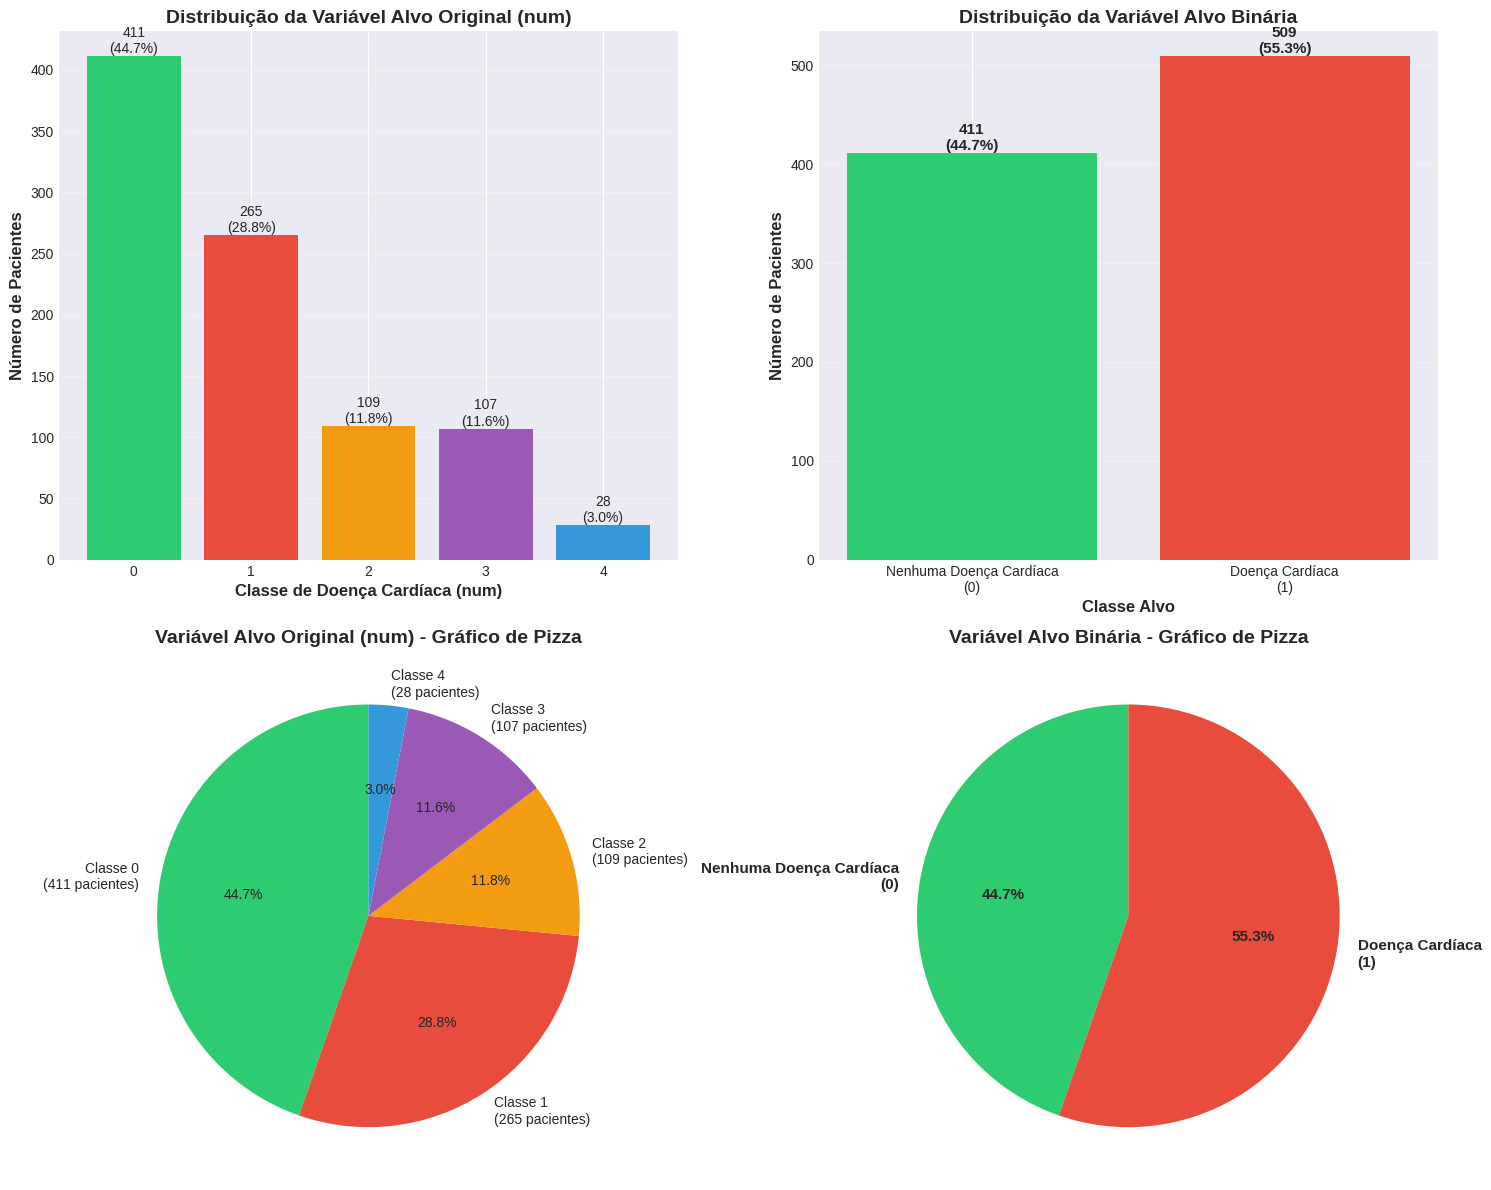

In [29]:
# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ============================================================================
# 1. Variável alvo original (num) - Gráfico de barras
# ============================================================================
ax1 = axes[0, 0]
num_counts = df['num'].value_counts().sort_index()
bars1 = ax1.bar(num_counts.index.astype(str), num_counts.values,
                color=['#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#3498db'])
ax1.set_xlabel('Classe de Doença Cardíaca (num)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Número de Pacientes', fontsize=12, fontweight='bold')
ax1.set_title('Distribuição da Variável Alvo Original (num)', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Adicionar rótulos de valor nas barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(df)*100:.1f}%)',  # ← CORRIGIDO! \n dentro da f-string
             ha='center', va='bottom', fontsize=10)

# ============================================================================
# 2. Variável alvo binária - Gráfico de barras
# ============================================================================
ax2 = axes[0, 1]
target_counts = df['target'].value_counts().sort_index()
colors = ['#2ecc71', '#e74c3c']  # Verde para sem doença, Vermelho para com doença
bars2 = ax2.bar(['Nenhuma Doença Cardíaca\n(0)', 'Doença Cardíaca\n(1)'],
                target_counts.values, color=colors)
ax2.set_xlabel('Classe Alvo', fontsize=12, fontweight='bold')
ax2.set_ylabel('Número de Pacientes', fontsize=12, fontweight='bold')
ax2.set_title('Distribuição da Variável Alvo Binária', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Adicionar rótulos de valor nas barras
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(df)*100:.1f}%)',  # ← CORRIGIDO!
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# ============================================================================
# 3. Variável alvo original - Gráfico de pizza
# ============================================================================
ax3 = axes[1, 0]
labels_original = [f'Classe {i}\n({df["num"].value_counts()[i]} pacientes)'
                   for i in sorted(df['num'].unique())]
colors_pie = ['#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#3498db'][:len(labels_original)]
ax3.pie(df['num'].value_counts().sort_index().values,
        labels=labels_original, autopct='%1.1f%%',
        colors=colors_pie, startangle=90)
ax3.set_title('Variável Alvo Original (num) - Gráfico de Pizza', fontsize=14, fontweight='bold')

# ============================================================================
# 4. Variável alvo binária - Gráfico de pizza
# ============================================================================
ax4 = axes[1, 1]
labels_binary = ['Nenhuma Doença Cardíaca\n(0)', 'Doença Cardíaca\n(1)']
colors_binary = ['#2ecc71', '#e74c3c']
ax4.pie(df['target'].value_counts().sort_index().values,
        labels=labels_binary, autopct='%1.1f%%',
        colors=colors_binary, startangle=90,
        textprops={'fontsize': 11, 'fontweight': 'bold'})
ax4.set_title('Variável Alvo Binária - Gráfico de Pizza', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [30]:
# Análise de equilíbrio de classes
print("="*80)
print("ANÁLISE DE EQUILÍBRIO DE CLASSES")
print("="*80)

binary_counts = df['target'].value_counts()
total = len(df)
no_disease = binary_counts[0]
disease = binary_counts[1]

print(f"\nTotal de pacientes: {total}")
print(f"\nNenhuma Doença Cardíaca (0): {no_disease} pacientes ({no_disease/total*100:.2f}%)")
print(f"Doença Cardíaca (1): {disease} pacientes ({disease/total*100:.2f}%)")
print(f"\nRazão (Nenhuma Doença : Doença): {no_disease} : {disease} = {no_disease/disease:.2f}:1")

# Verificar se está equilibrado (geralmente considerado equilibrado se a razão estiver entre 0.8 e 1.25)
ratio = no_disease / disease if disease > 0 else 0
if 0.8 <= ratio <= 1.25:
    balance_status = " RELATIVAMENTE EQUILIBRADO"
elif ratio < 0.8:
    balance_status = " DESEQUILIBRADO (A classe 'Doença' é maior)"
else:
    balance_status = " DESEQUILIBRADO (A classe 'Nenhuma Doença' é maior)"

print(f"\nStatus do Equilíbrio: {balance_status}")

ANÁLISE DE EQUILÍBRIO DE CLASSES

Total de pacientes: 920

Nenhuma Doença Cardíaca (0): 411 pacientes (44.67%)
Doença Cardíaca (1): 509 pacientes (55.33%)

Razão (Nenhuma Doença : Doença): 411 : 509 = 0.81:1

Status do Equilíbrio:  RELATIVAMENTE EQUILIBRADO


In [31]:
# Cálculo da precisão baseline
# Baseline = precisão se prevermos a classe majoritária
majority_class = df['target'].mode()[0]
baseline_accuracy = (df['target'] == majority_class).sum() / len(df) * 100

print("="*80)
print("DESEMPENHO DO MODELO BASELINE")
print("="*80)
print(f"\nClasse Majoritária: {majority_class} ({'Nenhuma Doença Cardíaca' if majority_class == 0 else 'Doença Cardíaca'})")
print(f"Precisão Baseline (Preditivo da Classe Majoritária): {baseline_accuracy:.2f}%")
print(f"\n📊 Nosso modelo precisa ter um desempenho melhor que {baseline_accuracy:.2f}% para ser útil!")
print(f"🎯 Meta Alvo: 95% de precisão")

DESEMPENHO DO MODELO BASELINE

Classe Majoritária: 1 (Doença Cardíaca)
Precisão Baseline (Preditivo da Classe Majoritária): 55.33%

📊 Nosso modelo precisa ter um desempenho melhor que 55.33% para ser útil!
🎯 Meta Alvo: 95% de precisão


In [32]:
# Obter lista de colunas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("="*80)
print("VISÃO GERAL DAS VARIÁVEIS CATEGÓRICAS")
print("="*80)
print(f"\nColunas categóricas: {categorical_cols}")
print(f"Total de colunas categóricas: {len(categorical_cols)}")

# Verificar valores ausentes em colunas categóricas
print("\n" + "="*80)
print("VALORES AUSENTES EM COLUNAS CATEGÓRICAS")
print("="*80)
cat_missing = df[categorical_cols].isnull().sum()
cat_missing_pct = (cat_missing / len(df)) * 100
cat_missing_df = pd.DataFrame({
    'Coluna': cat_missing.index,
    'Contagem Ausente': cat_missing.values,
    'Porcentagem Ausente': cat_missing_pct.values
})
cat_missing_df = cat_missing_df[cat_missing_df['Contagem Ausente'] > 0].sort_values('Contagem Ausente', ascending=False)
if len(cat_missing_df) > 0:
    print(cat_missing_df.to_string(index=False))
else:
    print("Nenhum valor ausente em colunas categóricas!")

VISÃO GERAL DAS VARIÁVEIS CATEGÓRICAS

Colunas categóricas: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Total de colunas categóricas: 8

VALORES AUSENTES EM COLUNAS CATEGÓRICAS
 Coluna  Contagem Ausente  Porcentagem Ausente
   thal               486            52.826087
  slope               309            33.586957
    fbs                90             9.782609
  exang                55             5.978261
restecg                 2             0.217391


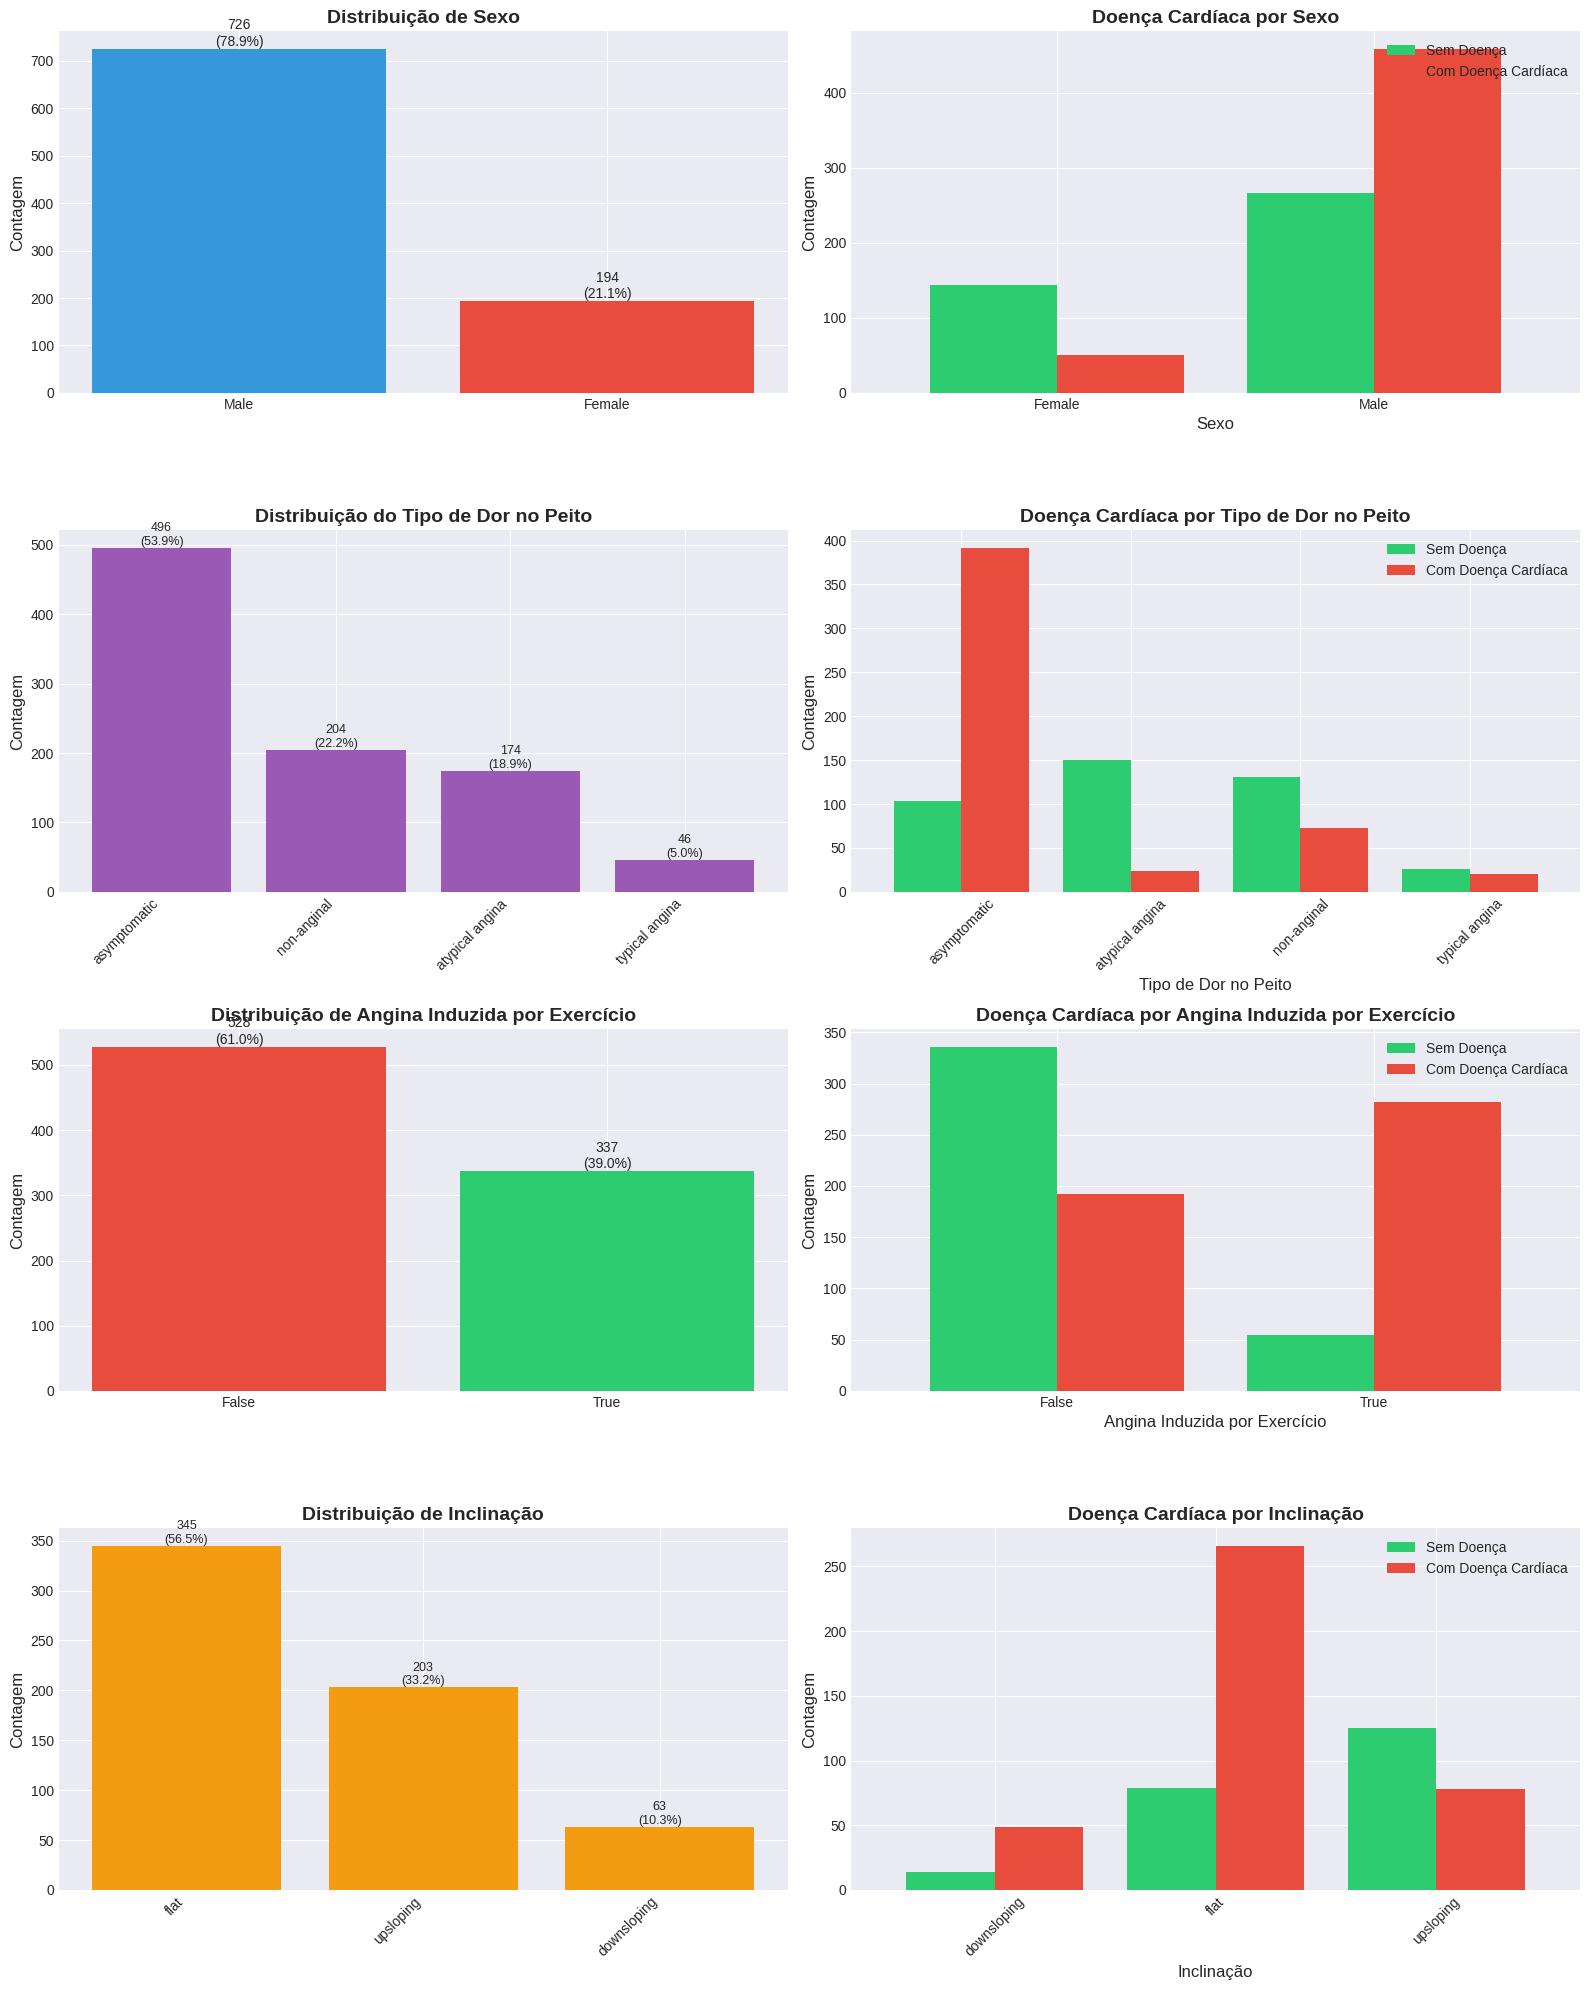

In [33]:
# Criar visualizações abrangentes para variáveis categóricas
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

# 1. Distribuição de Sexo
ax1 = axes[0, 0]
sex_counts = df['sex'].value_counts()
colors_sex = ['#3498db', '#e74c3c']
bars1 = ax1.bar(sex_counts.index, sex_counts.values, color=colors_sex)
ax1.set_title('Distribuição de Sexo', fontsize=14, fontweight='bold')
ax1.set_ylabel('Contagem', fontsize=12)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10)

# 2. Sexo vs Alvo
ax2 = axes[0, 1]
sex_target = pd.crosstab(df['sex'], df['target'])
sex_target.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c'], width=0.8)
ax2.set_title('Doença Cardíaca por Sexo', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sexo', fontsize=12)
ax2.set_ylabel('Contagem', fontsize=12)
ax2.legend(['Sem Doença', 'Com Doença Cardíaca'], loc='upper right')
ax2.tick_params(axis='x', rotation=0)

# 3. Distribuição do Tipo de Dor no Peito
ax3 = axes[1, 0]
cp_counts = df['cp'].value_counts()
bars3 = ax3.bar(range(len(cp_counts)), cp_counts.values, color='#9b59b6')
ax3.set_xticks(range(len(cp_counts)))
ax3.set_xticklabels(cp_counts.index, rotation=45, ha='right')
ax3.set_title('Distribuição do Tipo de Dor no Peito', fontsize=14, fontweight='bold')
ax3.set_ylabel('Contagem', fontsize=12)
for i, (idx, val) in enumerate(cp_counts.items()):
    ax3.text(i, val, f'{int(val)}\n({val/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)

# 4. Tipo de Dor no Peito vs Alvo
ax4 = axes[1, 1]
cp_target = pd.crosstab(df['cp'], df['target'])
cp_target.plot(kind='bar', ax=ax4, color=['#2ecc71', '#e74c3c'], width=0.8)
ax4.set_title('Doença Cardíaca por Tipo de Dor no Peito', fontsize=14, fontweight='bold')
ax4.set_xlabel('Tipo de Dor no Peito', fontsize=12)
ax4.set_ylabel('Contagem', fontsize=12)
ax4.legend(['Sem Doença', 'Com Doença Cardíaca'], loc='upper right')
ax4.tick_params(axis='x', rotation=45)

# 5. Distribuição de Angina Induzida por Exercício
ax5 = axes[2, 0]
exang_counts = df['exang'].dropna().value_counts()
colors_exang = ['#e74c3c', '#2ecc71']
bars5 = ax5.bar(exang_counts.index.astype(str), exang_counts.values, color=colors_exang)
ax5.set_title('Distribuição de Angina Induzida por Exercício', fontsize=14, fontweight='bold')
ax5.set_ylabel('Contagem', fontsize=12)
for bar in bars5:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(df[df["exang"].notna()])*100:.1f}%)',
             ha='center', va='bottom', fontsize=10)

# 6. Angina Induzida por Exercício vs Alvo
ax6 = axes[2, 1]
exang_target = pd.crosstab(df['exang'], df['target'], dropna=True)
exang_target.plot(kind='bar', ax=ax6, color=['#2ecc71', '#e74c3c'], width=0.8)
ax6.set_title('Doença Cardíaca por Angina Induzida por Exercício', fontsize=14, fontweight='bold')
ax6.set_xlabel('Angina Induzida por Exercício', fontsize=12)
ax6.set_ylabel('Contagem', fontsize=12)
ax6.legend(['Sem Doença', 'Com Doença Cardíaca'], loc='upper right')
ax6.tick_params(axis='x', rotation=0)

# 7. Distribuição de Inclinação
ax7 = axes[3, 0]
slope_counts = df['slope'].dropna().value_counts()
bars7 = ax7.bar(range(len(slope_counts)), slope_counts.values, color='#f39c12')
ax7.set_xticks(range(len(slope_counts)))
ax7.set_xticklabels(slope_counts.index, rotation=45, ha='right')
ax7.set_title('Distribuição de Inclinação', fontsize=14, fontweight='bold')
ax7.set_ylabel('Contagem', fontsize=12)
for i, (idx, val) in enumerate(slope_counts.items()):
    ax7.text(i, val, f'{int(val)}\n({val/len(df[df["slope"].notna()])*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)

# 8. Inclinação vs Alvo
ax8 = axes[3, 1]
slope_target = pd.crosstab(df['slope'], df['target'], dropna=True)
slope_target.plot(kind='bar', ax=ax8, color=['#2ecc71', '#e74c3c'], width=0.8)
ax8.set_title('Doença Cardíaca por Inclinação', fontsize=14, fontweight='bold')
ax8.set_xlabel('Inclinação', fontsize=12)
ax8.set_ylabel('Contagem', fontsize=12)
ax8.legend(['Sem Doença', 'Com Doença Cardíaca'], loc='upper right')
ax8.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [34]:
# Obter lista de colunas numéricas (excluindo id e target)
numerical_cols = [col for col in df.select_dtypes(include=[np.number]).columns.tolist()
                  if col not in ['id', 'num', 'target']]

print("="*80)
print("VISÃO GERAL DAS VARIÁVEIS NUMÉRICAS")
print("="*80)
print(f"\nColunas numéricas (excluindo id, num, target): {numerical_cols}")
print(f"Total de colunas numéricas para análise: {len(numerical_cols)}")

# Verificar valores ausentes em colunas numéricas
print("\n" + "="*80)
print("VALORES AUSENTES EM COLUNAS NUMÉRICAS")
print("="*80)
num_missing = df[numerical_cols].isnull().sum()
num_missing_pct = (num_missing / len(df)) * 100
num_missing_df = pd.DataFrame({
    'Coluna': num_missing.index,
    'Contagem Ausente': num_missing.values,
    'Porcentagem Ausente': num_missing_pct.values
})
num_missing_df = num_missing_df[num_missing_df['Contagem Ausente'] > 0].sort_values('Contagem Ausente', ascending=False)
if len(num_missing_df) > 0:
    print(num_missing_df.to_string(index=False))
else:
    print("Nenhum valor ausente em colunas numéricas!")

VISÃO GERAL DAS VARIÁVEIS NUMÉRICAS

Colunas numéricas (excluindo id, num, target): ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Total de colunas numéricas para análise: 6

VALORES AUSENTES EM COLUNAS NUMÉRICAS
  Coluna  Contagem Ausente  Porcentagem Ausente
      ca               611            66.413043
 oldpeak                62             6.739130
trestbps                59             6.413043
  thalch                55             5.978261
    chol                30             3.260870


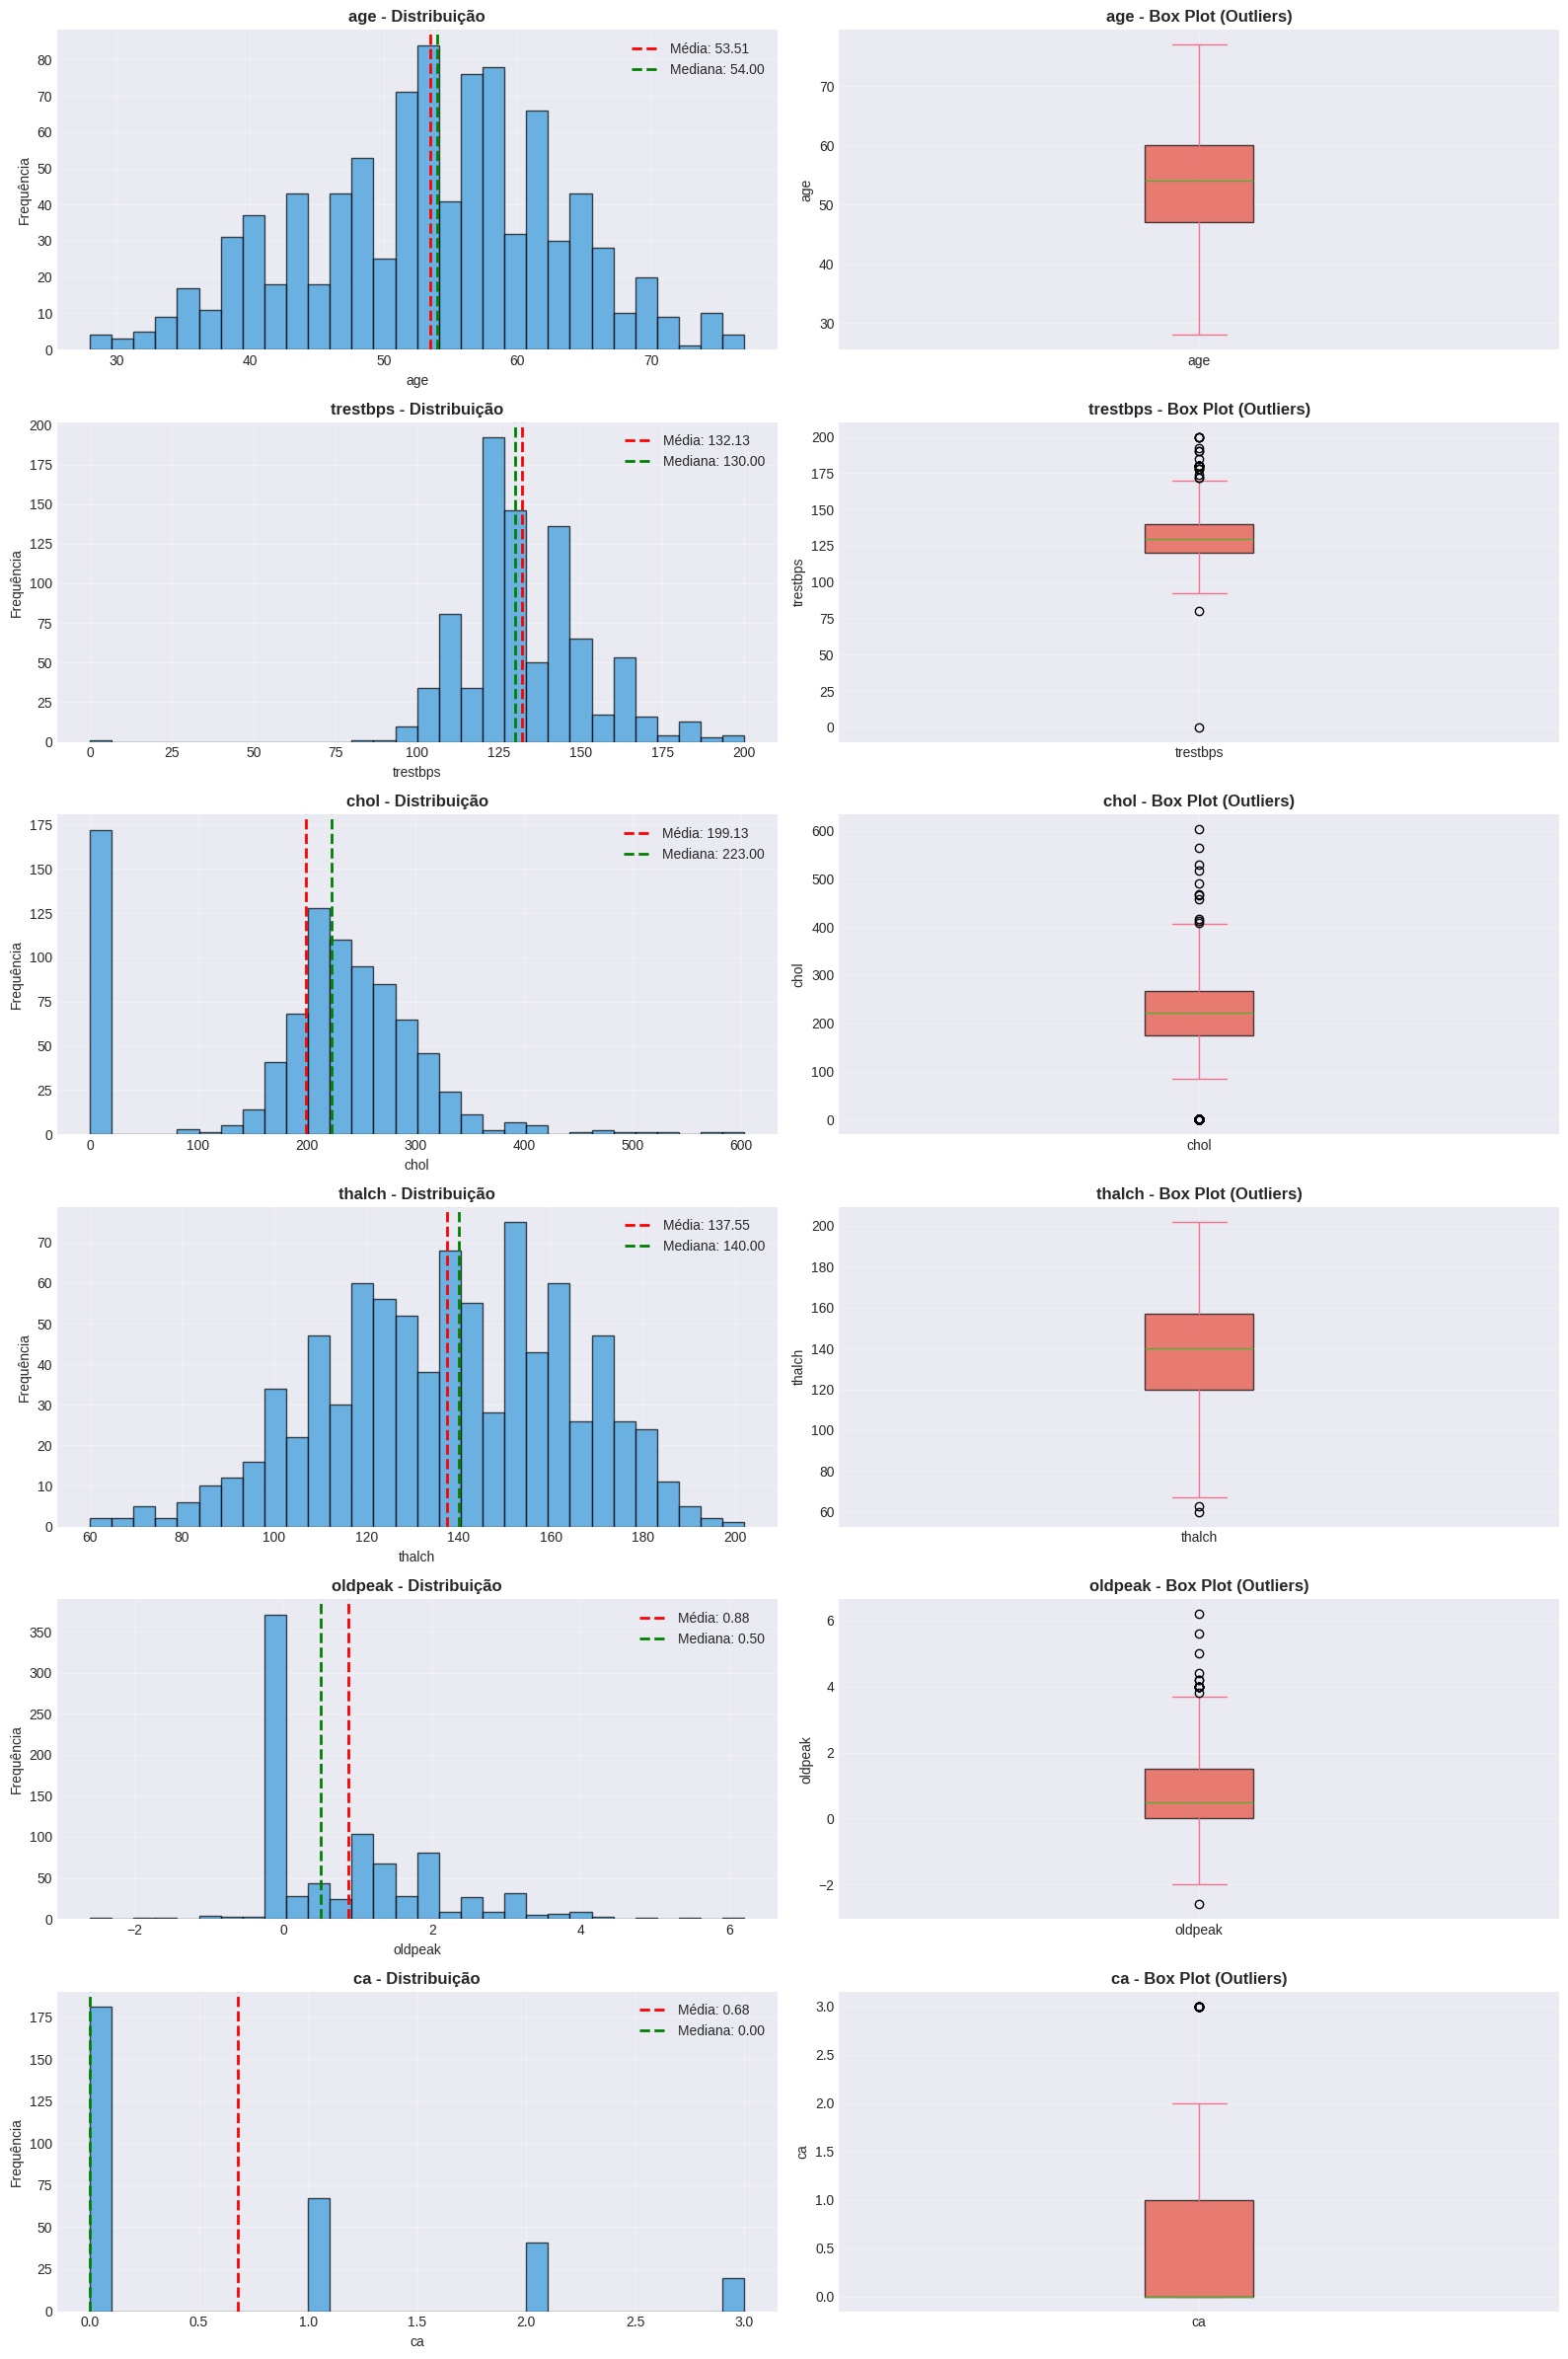

In [35]:
# Criar histogramas e box plots para todas as variáveis numéricas
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(16, 4*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histograma
    ax1 = axes[i, 0]
    df[col].hist(bins=30, ax=ax1, color='#3498db', edgecolor='black', alpha=0.7)
    ax1.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df[col].mean():.2f}')
    ax1.axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df[col].median():.2f}')
    ax1.set_title(f'{col} - Distribuição', fontsize=12, fontweight='bold')
    ax1.set_xlabel(col, fontsize=10)
    ax1.set_ylabel('Frequência', fontsize=10)
    ax1.legend()
    ax1.grid(alpha=0.3)

    # Box plot
    ax2 = axes[i, 1]
    df[col].dropna().plot(kind='box', ax=ax2, vert=True, patch_artist=True,
                          boxprops=dict(facecolor='#e74c3c', alpha=0.7))
    ax2.set_title(f'{col} - Box Plot (Outliers)', fontsize=12, fontweight='bold')
    ax2.set_ylabel(col, fontsize=10)
    ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

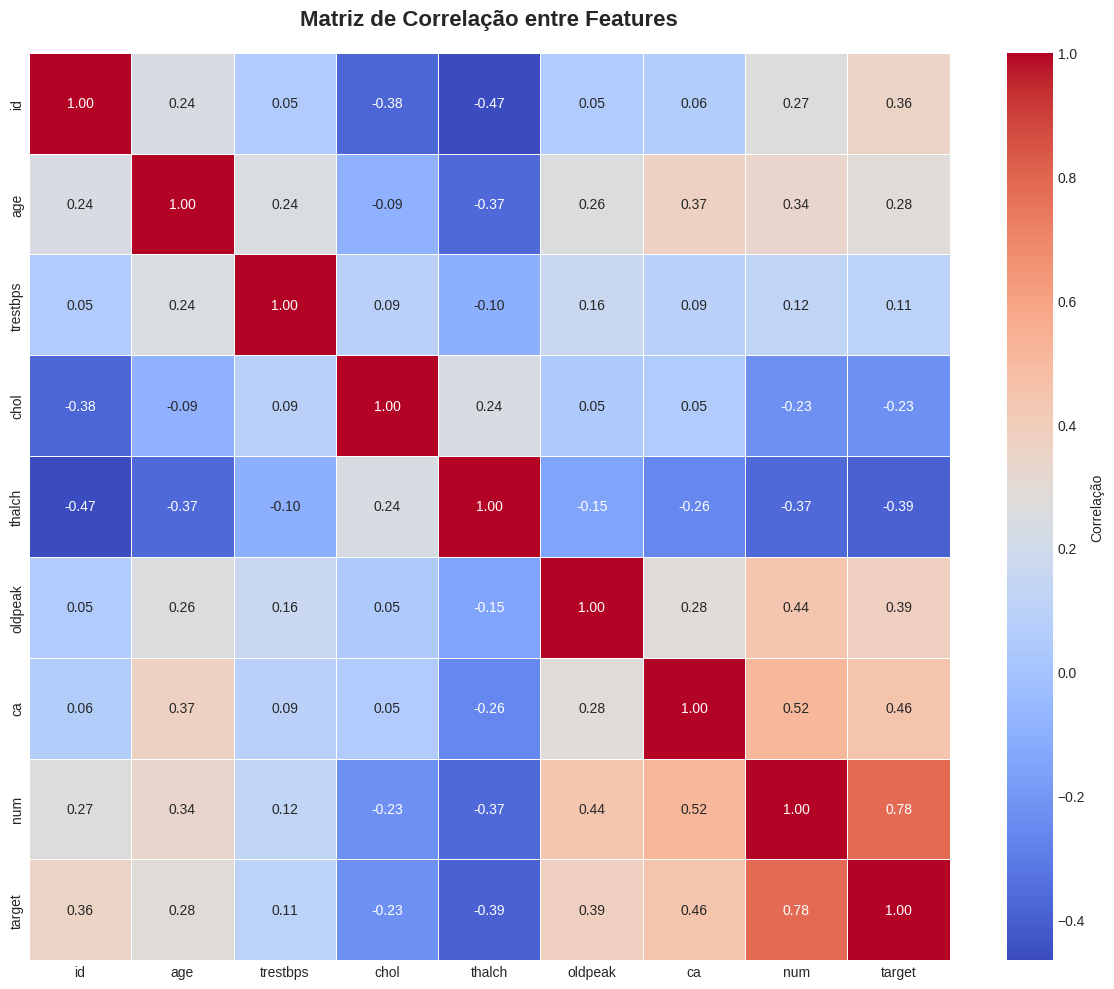

In [37]:
# Matriz de correlação
plt.figure(figsize=(12, 10))

# Filtrar apenas colunas numéricas para o cálculo da correlação
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação entre Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Correlação das features com a variável num:
num         1.000000
target      0.783387
ca          0.516216
oldpeak     0.443084
age         0.339596
id          0.273552
trestbps    0.122291
chol       -0.231547
thalch     -0.366265
Name: num, dtype: float64


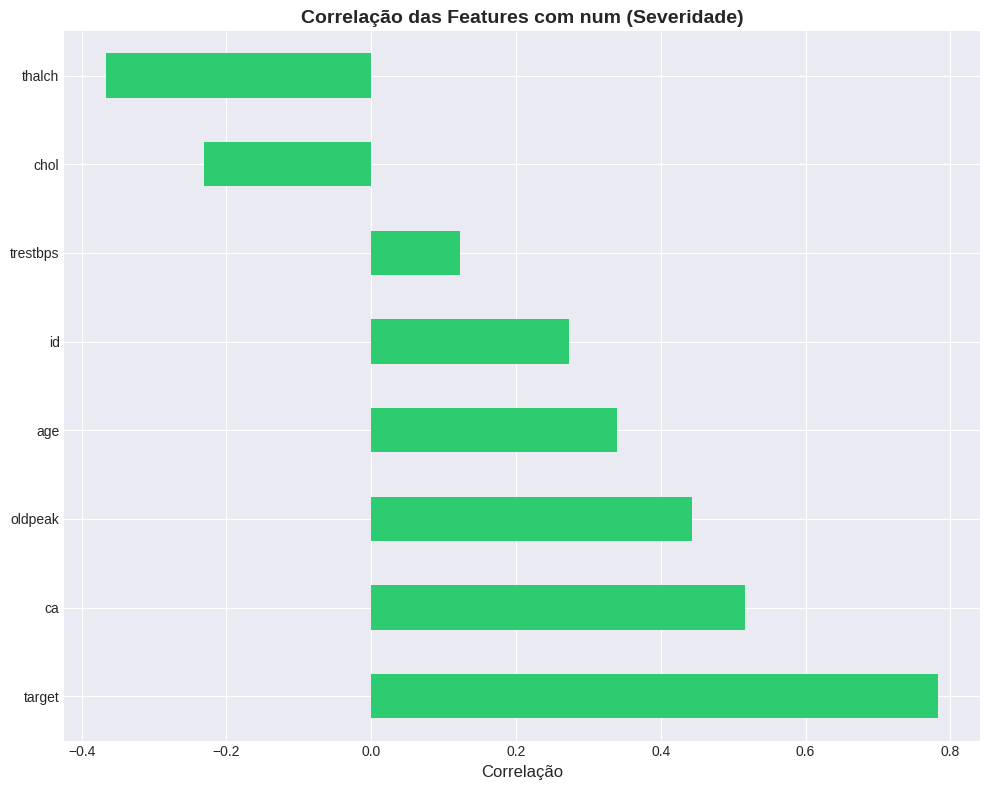

In [38]:
# Correlação com a variável alvo (num)
num_correlation = df.select_dtypes(include=['number']).corr()['num'].sort_values(ascending=False)
print("Correlação das features com a variável num:")
print(num_correlation)

# Visualização
plt.figure(figsize=(10, 8))
num_correlation[1:].plot(kind='barh', color='#2ecc71')
plt.title('Correlação das Features com num (Severidade)', fontsize=14, fontweight='bold')
plt.xlabel('Correlação', fontsize=12)
plt.tight_layout()
plt.show()

## 5. Pré-processamento dos Dados

In [39]:
# Separar features (X) e target (y)
X = df.drop('num', axis=1)
y = df['num']

print(f"Shape de X (features): {X.shape}")
print(f"Shape de y (num): {y.shape}")
print(f"\nClasses em y: {sorted(y.unique())}")

Shape de X (features): (920, 16)
Shape de y (num): (920,)

Classes em y: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [40]:
# Remover colunas irrelevantes
X = X.drop(['id', 'target', 'dataset'], axis=1, errors='ignore')

# Preencher NaN com 0
X = X.fillna(0)

# Converter tudo para numérico
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'bool':
        X[col] = le.fit_transform(X[col].astype(str))

print(f"✓ Pronto! Shape: {X.shape}")

✓ Pronto! Shape: (920, 13)


In [41]:
# Dividir em conjunto de treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")
print(f"\nDistribuição no treino: \n{y_train.value_counts().sort_index()}")
print(f"\nDistribuição no teste: \n{y_test.value_counts().sort_index()}")

Tamanho do conjunto de treino: 736 amostras
Tamanho do conjunto de teste: 184 amostras

Distribuição no treino: 
num
0    329
1    212
2     87
3     86
4     22
Name: count, dtype: int64

Distribuição no teste: 
num
0    82
1    53
2    22
3    21
4     6
Name: count, dtype: int64


In [42]:
# Normalização dos dados (importante para SVM e KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Dados normalizados com sucesso!")
print(f"\nMédia após normalização (treino): {X_train_scaled.mean(axis=0).round(2)}")
print(f"Desvio padrão após normalização (treino): {X_train_scaled.std(axis=0).round(2)}")

✓ Dados normalizados com sucesso!

Média após normalização (treino): [-0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.]
Desvio padrão após normalização (treino): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 5.1 Visualização da Distribuição dos Dados (PCA)

Utilizamos **PCA (Principal Component Analysis)** para visualizar os dados em 2D e 3D, reduzindo as 13 features originais.

**Principais Observações:**

- **Variância capturada:** 96.1% (2D) e 99.5% (3D) - preserva quase toda a informação original
- **Sobreposição significativa** entre as classes, especialmente no centro do gráfico
- **Não há clusters claramente separados**, indicando que a separação entre severidades não é trivial
- Pacientes sem doença (verde) e com doença leve/moderada (azul/laranja) estão bastante misturados

**Interpretação:**

A sobreposição entre classes é esperada em dados médicos reais e demonstra que o problema é **complexo e desafiador**. Isso justifica o uso de algoritmos de Machine Learning sofisticados (Random Forest, SVM, KNN) para capturar padrões não-lineares que não seriam identificados por regras simples.

---


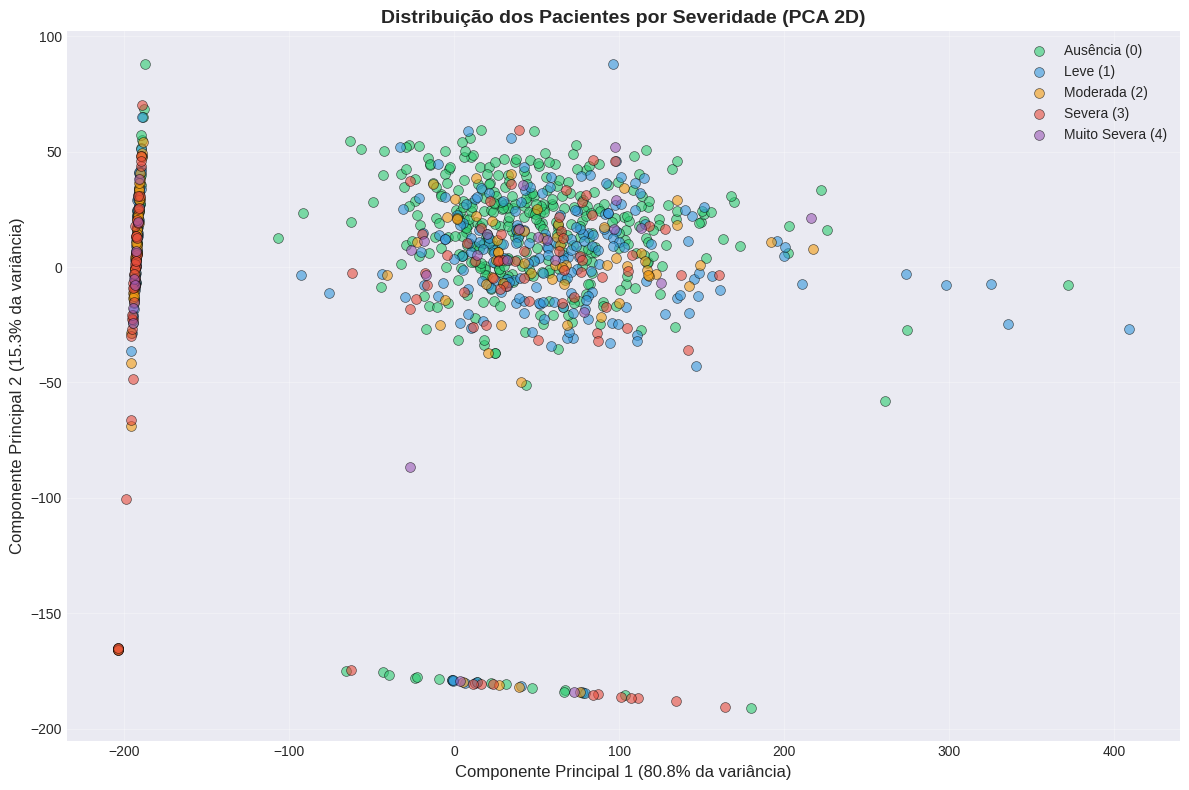

Variância explicada pelos 2 componentes: 96.1%


In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzir dimensionalidade para 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criar scatter plot
plt.figure(figsize=(12, 8))
colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#9b59b6']
labels = ['Ausência (0)', 'Leve (1)', 'Moderada (2)', 'Severa (3)', 'Muito Severa (4)']

for i in range(5):
    mask = (y == i)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=colors[i], label=labels[i],
                alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} da variância)', fontsize=12)
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%} da variância)', fontsize=12)
plt.title('Distribuição dos Pacientes por Severidade (PCA 2D)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Variância explicada pelos 2 componentes: {pca.explained_variance_ratio_.sum():.1%}")


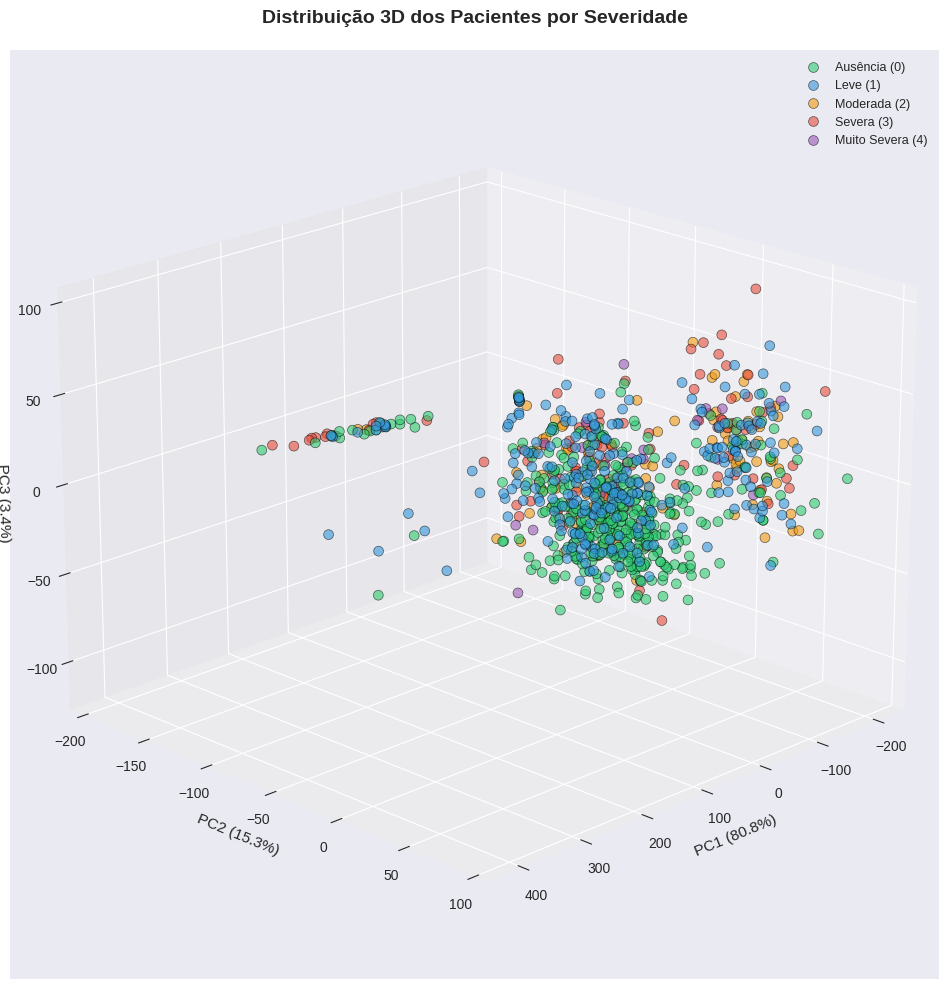

Variância explicada pelos 3 componentes: 99.5%


In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Reduzir para 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Criar plot 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#9b59b6']
labels = ['Ausência (0)', 'Leve (1)', 'Moderada (2)', 'Severa (3)', 'Muito Severa (4)']

for i in range(5):
    mask = (y == i)
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2],
               c=colors[i], label=labels[i],
               alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})', fontsize=11)
ax.set_title('Distribuição 3D dos Pacientes por Severidade', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=9)
ax.view_init(elev=20, azim=45)  # Melhor ângulo de visualização

plt.tight_layout()
plt.show()

print(f"Variância explicada pelos 3 componentes: {pca.explained_variance_ratio_.sum():.1%}")


---
# 6. ALGORITMOS DE CLASSIFICAÇÃO MULTI-CLASSE
---

## 6.1 Algoritmo 1: Regressão Logística Multinomial

**Responsável:** André Santos

### Descrição do Algoritmo

A **Regressão Logística Multinomial** é uma extensão da regressão logística binária para problemas de **classificação multi-classe**. Modela a probabilidade de uma instância pertencer a cada uma das classes.

**Como funciona:**
- Usa a função softmax para calcular probabilidades para cada classe
- Cada classe tem seu próprio conjunto de coeficientes
- A classe com maior probabilidade é selecionada

**Vantagens:**
- Simples e eficiente computacionalmente
- Interpreta bem os resultados (coeficientes por classe)
- Funciona bem com features linearmente separáveis

**Desvantagens:**
- Assume relação linear entre features e log-odds
- Pode ter baixa performance com relações não-lineares complexas

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuração do Grid Search para Regressão Logística
print("="*60)
print("TREINANDO MODELO OTIMIZADO: REGRESSÃO LOGÍSTICA (GRID SEARCH)")
print("="*60)

# 1. Definimos o "dicionário" de parâmetros para testar
# O 'class_weight': ['balanced'] é o principal para tentar salvar as classes com métricas baixas
param_grid_lr = {
    'C': [0.1, 1, 10, 100],                    # Força da regularização
    'solver': ['newton-cg', 'lbfgs'],          # Algoritmos de otimização (liblinear não suporta multinomial bem as vezes)
    'class_weight': ['balanced', None]         # Tenta balancear os pesos das classes automaticamente
}

# 2. Criamos o objeto GridSearchCV
# scoring='f1_macro' força o algoritmo a buscar a melhor média entre as 5 classes
grid_lr = GridSearchCV(
    LogisticRegression(multi_class='multinomial', max_iter=2000, random_state=42),
    param_grid_lr,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)

# 3. Treinamos (Isso vai demorar um pouquinho mais que o treino simples)
grid_lr.fit(X_train_scaled, y_train)

print("✓ Otimização concluída!")
print(f"Melhores parâmetros encontrados: {grid_lr.best_params_}")
print(f"Melhor F1-Macro durante o treino (validação cruzada): {grid_lr.best_score_:.4f}")

# 4. Pegamos o "Campeão" (o melhor modelo encontrado)
best_log_reg = grid_lr.best_estimator_

# ---------------------------------------------------------
# AVALIAÇÃO DO MELHOR MODELO NOS DADOS DE TESTE
# ---------------------------------------------------------

# Fazer predições usando o melhor modelo
y_pred_log_reg = best_log_reg.predict(X_test_scaled)

# Calcular métricas (usando macro average para multi-classe)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='macro', zero_division=0)
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='macro', zero_division=0)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='macro', zero_division=0)
f1_weighted_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted', zero_division=0)

print("\n📊 MÉTRICAS - REGRESSÃO LOGÍSTICA (OTIMIZADA)")
print("-" * 60)
print(f"Acurácia:            {accuracy_log_reg:.4f} ({accuracy_log_reg*100:.2f}%)")
print(f"Precisão (Macro):    {precision_log_reg:.4f}")
print(f"Recall (Macro):      {recall_log_reg:.4f}")
print(f"F1-Score (Macro):    {f1_log_reg:.4f}")
print(f"F1-Score (Weighted): {f1_weighted_log_reg:.4f}")
print("-" * 60)

TREINANDO MODELO OTIMIZADO: REGRESSÃO LOGÍSTICA (GRID SEARCH)
✓ Otimização concluída!
Melhores parâmetros encontrados: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'newton-cg'}
Melhor F1-Macro durante o treino (validação cruzada): 0.3494

📊 MÉTRICAS - REGRESSÃO LOGÍSTICA (OTIMIZADA)
------------------------------------------------------------
Acurácia:            0.4946 (49.46%)
Precisão (Macro):    0.3455
Recall (Macro):      0.3874
F1-Score (Macro):    0.3364
F1-Score (Weighted): 0.5081
------------------------------------------------------------


In [94]:
# Relatório de classificação detalhado
print("\n📋 RELATÓRIO DE CLASSIFICAÇÃO - REGRESSÃO LOGÍSTICA")
print("=" * 60)
print(classification_report(y_test, y_pred_log_reg,
                          target_names=['Ausência (0)', 'Leve (1)', 'Moderada (2)',
                                       'Severa (3)', 'Muito Severa (4)'],
                          zero_division=0))


📋 RELATÓRIO DE CLASSIFICAÇÃO - REGRESSÃO LOGÍSTICA
                  precision    recall  f1-score   support

    Ausência (0)       0.81      0.77      0.79        82
        Leve (1)       0.47      0.34      0.40        53
    Moderada (2)       0.15      0.09      0.11        22
      Severa (3)       0.19      0.24      0.21        21
Muito Severa (4)       0.11      0.50      0.18         6

        accuracy                           0.49       184
       macro avg       0.35      0.39      0.34       184
    weighted avg       0.54      0.49      0.51       184



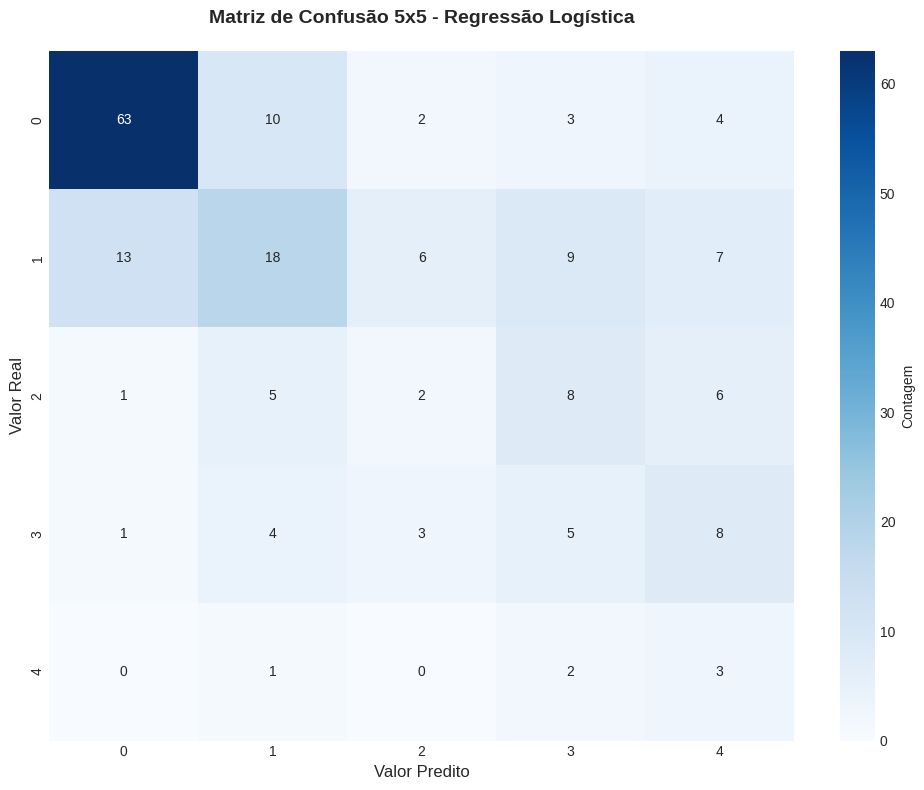

In [84]:
# Matriz de confusão 5x5
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2', '3', '4'],
            yticklabels=['0', '1', '2', '3', '4'],
            cbar_kws={'label': 'Contagem'})
plt.title('Matriz de Confusão 5x5 - Regressão Logística', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predito', fontsize=12)
plt.tight_layout()
plt.show()

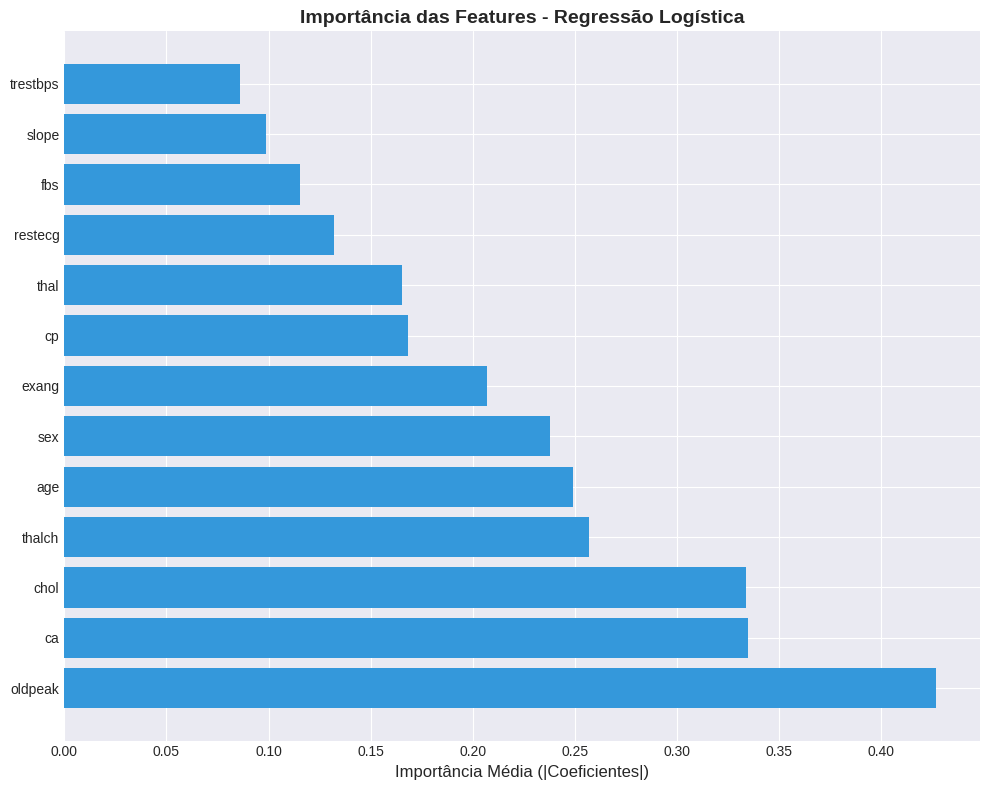


Top 5 features mais importantes:
    Feature  Importância
9   oldpeak     0.427118
11       ca     0.334667
4      chol     0.333724
7    thalch     0.256813
0       age     0.248906


In [85]:
# Importância das features (média dos coeficientes absolutos)
feature_importance_log_reg = pd.DataFrame({
    'Feature': X.columns,
    'Importância': np.abs(log_reg.coef_).mean(axis=0)
}).sort_values('Importância', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_log_reg['Feature'], feature_importance_log_reg['Importância'],
         color='#3498db')
plt.title('Importância das Features - Regressão Logística',
          fontsize=14, fontweight='bold')
plt.xlabel('Importância Média (|Coeficientes|)', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 5 features mais importantes:")
print(feature_importance_log_reg.head())

---
## 6.2 Algoritmo 2: Random Forest

**Responsável:** Igor Santo

### Descrição do Algoritmo

O **Random Forest** é um algoritmo de ensemble que constrói múltiplas árvores de decisão durante o treinamento e combina suas predições. Funciona naturalmente com classificação multi-classe.

**Como funciona:**
- Cria múltiplas árvores de decisão usando subconjuntos aleatórios dos dados (bootstrap)
- Cada árvore é treinada em um subconjunto aleatório de features
- A predição final é feita por votação majoritária

**Vantagens:**
- Alta precisão e robusto contra overfitting
- Captura relações não-lineares complexas
- Fornece importância das features
- Funciona bem com dados desbalanceados e multi-classe

**Desvantagens:**
- Pode ser lento para treinar com muitas árvores
- Menos interpretável que modelos simples
- Requer mais memória

In [106]:
print("="*60)
print("OTIMIZANDO MODELO: RANDOM FOREST (GRID SEARCH)")
print("="*60)

# 1. Definir o modelo base
rf = RandomForestClassifier(random_state=42)

# 2. Definir a grade de parâmetros para testar
# Ajustei valores estratégicos para não demorar uma eternidade,
# mas cobrir profundidade e balanceamento.
param_grid = {
    'n_estimators': [100, 200],          # Número de árvores
    'max_depth': [None, 10, 20],         # Profundidade máxima (evita overfitting)
    'min_samples_split': [2, 5],         # Mínimo para dividir um nó
    'min_samples_leaf': [1, 2],          # Mínimo em uma folha (suaviza o modelo)
    'class_weight': ['balanced', None]   # Crucial: testar se 'balanced' ajuda na classe 4
}

# 3. Configurar o Grid Search
# scoring='f1_macro' é importante para priorizar as classes menores (como a classe 4)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')

# 4. Treinar (Isso pode levar alguns minutos)
print("⏳ Iniciando a busca pelos melhores parâmetros...")
grid_search.fit(X_train_scaled, y_train)

# 5. Pegar o melhor modelo encontrado
best_rf = grid_search.best_estimator_

print("\n✓ Melhor combinação encontrada:")
print(grid_search.best_params_)

# Fazer predições com o MELHOR modelo
y_pred_rf = best_rf.predict(X_test_scaled)

# Calcular métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='macro', zero_division=0)
f1_weighted_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print("\n📊 MÉTRICAS - RANDOM FOREST (OTIMIZADO)")
print("-" * 60)
print(f"Acurácia:            {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"Precisão (Macro):    {precision_rf:.4f}")
print(f"Recall (Macro):      {recall_rf:.4f}")
print(f"F1-Score (Macro):    {f1_rf:.4f}")
print(f"F1-Score (Weighted): {f1_weighted_rf:.4f}")

print("-" * 60)

OTIMIZANDO MODELO: RANDOM FOREST (GRID SEARCH)
⏳ Iniciando a busca pelos melhores parâmetros...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

✓ Melhor combinação encontrada:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

📊 MÉTRICAS - RANDOM FOREST (OTIMIZADO)
------------------------------------------------------------
Acurácia:            0.5761 (57.61%)
Precisão (Macro):    0.3880
Recall (Macro):      0.3978
F1-Score (Macro):    0.3894
F1-Score (Weighted): 0.5854
------------------------------------------------------------


In [107]:
# Relatório de classificação detalhado
print("\n📋 RELATÓRIO DE CLASSIFICAÇÃO - RANDOM FOREST")
print("=" * 60)
print(classification_report(y_test, y_pred_rf,
                          target_names=['Ausência (0)', 'Leve (1)', 'Moderada (2)',
                                       'Severa (3)', 'Muito Severa (4)'],
                          zero_division=0))


📋 RELATÓRIO DE CLASSIFICAÇÃO - RANDOM FOREST
                  precision    recall  f1-score   support

    Ausência (0)       0.85      0.78      0.82        82
        Leve (1)       0.54      0.51      0.52        53
    Moderada (2)       0.30      0.32      0.31        22
      Severa (3)       0.24      0.38      0.30        21
Muito Severa (4)       0.00      0.00      0.00         6

        accuracy                           0.58       184
       macro avg       0.39      0.40      0.39       184
    weighted avg       0.60      0.58      0.59       184



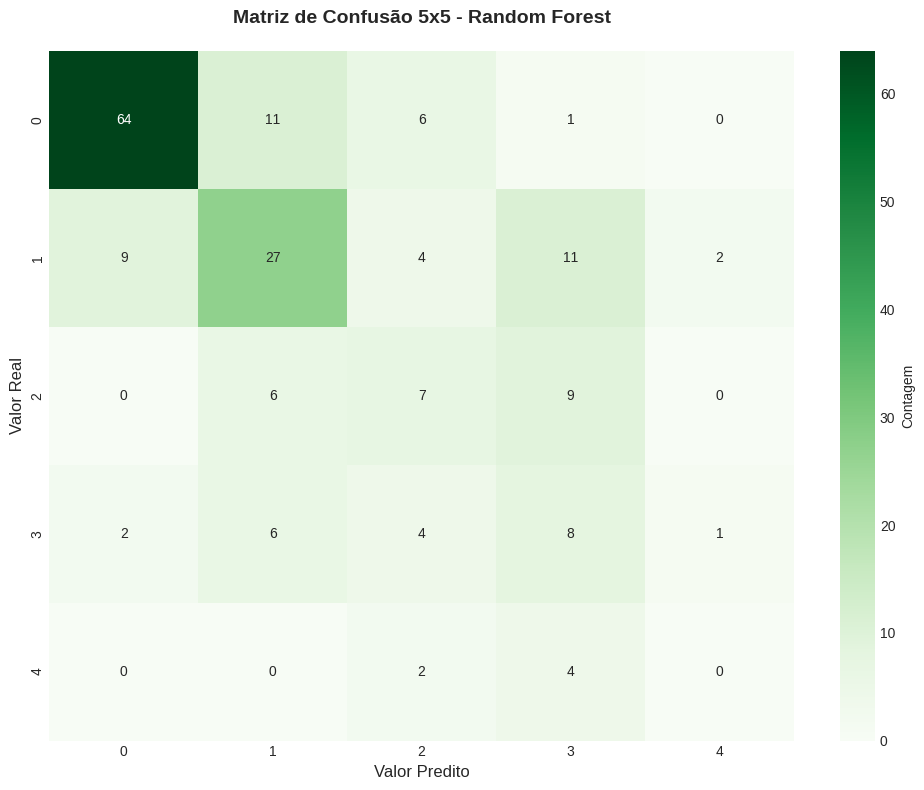

In [108]:
# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['0', '1', '2', '3', '4'],
            yticklabels=['0', '1', '2', '3', '4'],
            cbar_kws={'label': 'Contagem'})
plt.title('Matriz de Confusão 5x5 - Random Forest', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predito', fontsize=12)
plt.tight_layout()
plt.show()

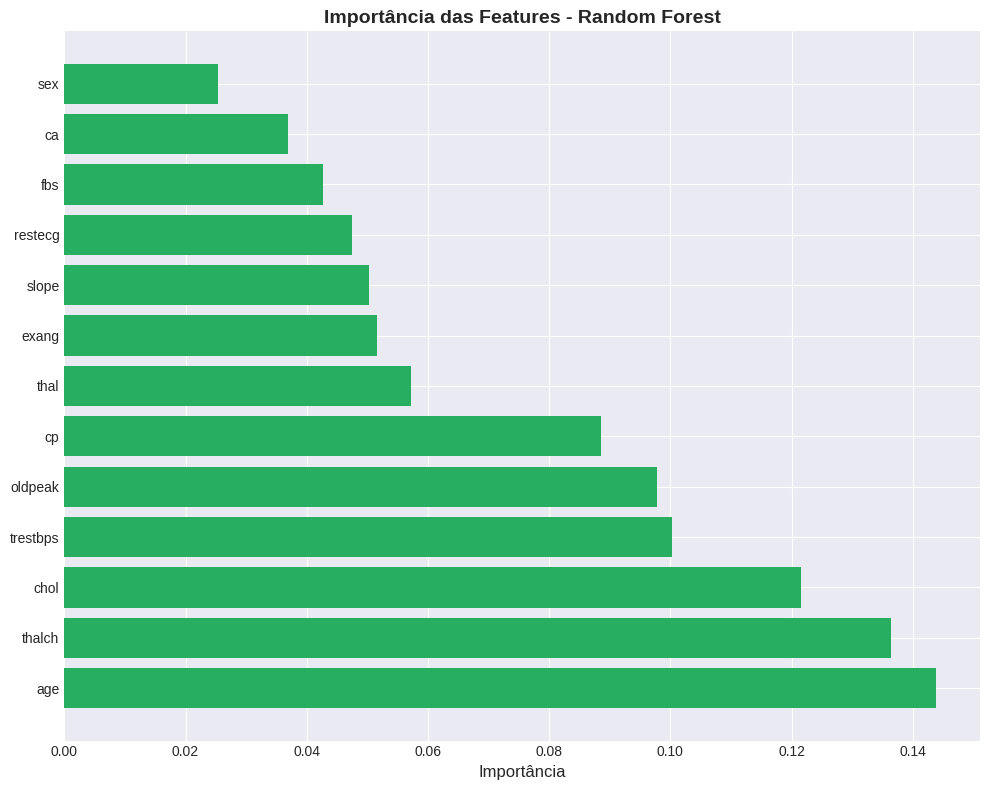


Top 5 features mais importantes:
    Feature  Importância
0       age     0.143909
7    thalch     0.136412
4      chol     0.121607
3  trestbps     0.100251
9   oldpeak     0.097796


In [53]:
# Importância das features
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importância': rf_clf.feature_importances_
}).sort_values('Importância', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importância'], color='#27ae60')
plt.title('Importância das Features - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importância', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 5 features mais importantes:")
print(feature_importance_rf.head())

---
## 6.3 Algoritmo 3: Support Vector Machine (SVM)

**Responsável:** João Marcos

### Descrição do Algoritmo

O **Support Vector Machine (SVM)** estende-se naturalmente para classificação multi-classe usando estratégias como One-vs-Rest (OvR) ou One-vs-One (OvO).

**Como funciona:**
- Encontra hiperplanos que maximizam a margem entre as classes
- Para multi-classe: treina múltiplos classificadores binários
- Usa apenas os pontos mais próximos à fronteira (support vectors)
- Pode usar kernels para transformar dados não-lineares

**Vantagens:**
- Eficaz em espaços de alta dimensão
- Funciona bem quando há clara separação entre classes
- Memória eficiente (usa apenas support vectors)

**Desvantagens:**
- Sensível à escala dos dados (requer normalização)
- Pode ser lento com grandes datasets
- Difícil de interpretar

In [109]:
print("="*60)
print("OTIMIZANDO MODELO: SVM (GRID SEARCH)")
print("="*60)

# 1. Definir o modelo base
svm = SVC(kernel='rbf', random_state=42)

# 2. Definir a grade de parâmetros para testar
# O SVM precisa encontrar o equilíbrio entre margem suave e ajuste aos dados.
param_grid = {
    'C': [0.1, 1, 10, 100],              # Controla a punição por erros (Regularização)
    'gamma': ['scale', 'auto', 0.1, 1],  # Controla a influência de cada ponto (Curvatura)
    'class_weight': ['balanced', None]   # Tenta dar pesos maiores para classes raras
}

# 3. Configurar o Grid Search
# scoring='f1_macro' ajuda a priorizar o acerto nas classes menores (4, 3, etc.)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid,
                               cv=3, n_jobs=-1, verbose=2, scoring='f1_macro')

# 4. Treinar
print("⏳ Iniciando a busca pelos melhores parâmetros do SVM...")
grid_search_svm.fit(X_train_scaled, y_train)

# 5. Pegar o melhor modelo
best_svm = grid_search_svm.best_estimator_

print("\n✓ Melhor combinação encontrada:")
print(grid_search_svm.best_params_)

# Fazer predições com o MELHOR modelo
y_pred_svm = best_svm.predict(X_test_scaled)

# Calcular métricas
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro', zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='macro', zero_division=0)
f1_macro_svm = f1_score(y_test, y_pred_svm, average='macro', zero_division=0)
f1_weighted_svm = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

print("\n📊 MÉTRICAS - SVM (OTIMIZADO)")
print("-" * 60)
print(f"Acurácia:            {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")
print(f"Precisão (Macro):    {precision_svm:.4f}")
print(f"Recall (Macro):      {recall_svm:.4f}")
print(f"F1-Score (Macro):    {f1_macro_svm:.4f}")
print(f"F1-Score (Weighted): {f1_weighted_svm:.4f}")
print("-" * 60)

OTIMIZANDO MODELO: SVM (GRID SEARCH)
⏳ Iniciando a busca pelos melhores parâmetros do SVM...
Fitting 3 folds for each of 32 candidates, totalling 96 fits

✓ Melhor combinação encontrada:
{'C': 10, 'class_weight': None, 'gamma': 'auto'}

📊 MÉTRICAS - SVM (OTIMIZADO)
------------------------------------------------------------
Acurácia:            0.5707 (57.07%)
Precisão (Macro):    0.3426
Recall (Macro):      0.3529
F1-Score (Macro):    0.3475
F1-Score (Weighted): 0.5617
------------------------------------------------------------


In [110]:
# Relatório de classificação detalhado
print("\n📋 RELATÓRIO DE CLASSIFICAÇÃO - SVM")
print("=" * 60)
print(classification_report(y_test, y_pred_svm,
                          target_names=['Ausência (0)', 'Leve (1)', 'Moderada (2)',
                                       'Severa (3)', 'Muito Severa (4)'],
                          zero_division=0))


📋 RELATÓRIO DE CLASSIFICAÇÃO - SVM
                  precision    recall  f1-score   support

    Ausência (0)       0.80      0.84      0.82        82
        Leve (1)       0.52      0.51      0.51        53
    Moderada (2)       0.29      0.32      0.30        22
      Severa (3)       0.10      0.10      0.10        21
Muito Severa (4)       0.00      0.00      0.00         6

        accuracy                           0.57       184
       macro avg       0.34      0.35      0.35       184
    weighted avg       0.55      0.57      0.56       184



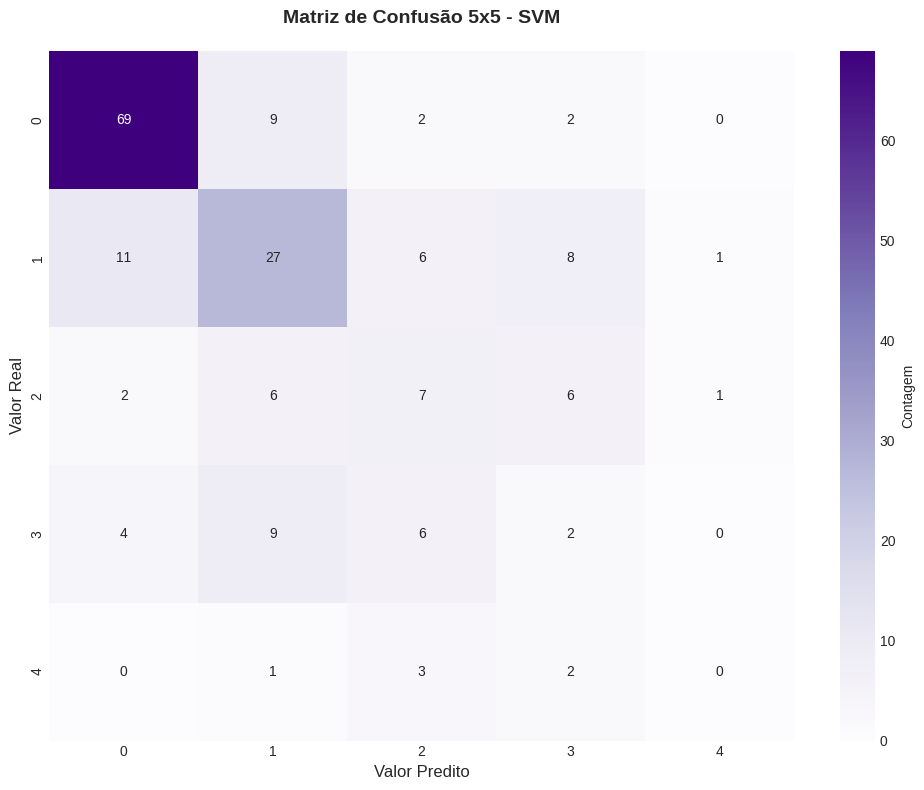

In [111]:
# Matriz de confusão
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['0', '1', '2', '3', '4'],
            yticklabels=['0', '1', '2', '3', '4'],
            cbar_kws={'label': 'Contagem'})
plt.title('Matriz de Confusão 5x5 - SVM', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predito', fontsize=12)
plt.tight_layout()
plt.show()

---
## 6.4 Algoritmo 4: K-Nearest Neighbors (KNN)

**Responsável:** Michelangelo

### Descrição do Algoritmo

O **K-Nearest Neighbors (KNN)** funciona naturalmente com classificação multi-classe, classificando novos pontos com base na classe majoritária dos K vizinhos mais próximos.

**Como funciona:**
- Armazena todos os dados de treinamento
- Para classificar um novo ponto, encontra os K vizinhos mais próximos
- A classe é determinada por votação majoritária dos K vizinhos
- A distância geralmente é medida usando distância Euclidiana

**Vantagens:**
- Simples de entender e implementar
- Não precisa de fase de treinamento (lazy learning)
- Funciona bem com dados não-lineares e multi-classe

**Desvantagens:**
- Lento na predição com grandes datasets
- Sensível à escala das features (requer normalização)
- Sofre com alta dimensionalidade (curse of dimensionality)

OTIMIZANDO O VALOR DE K


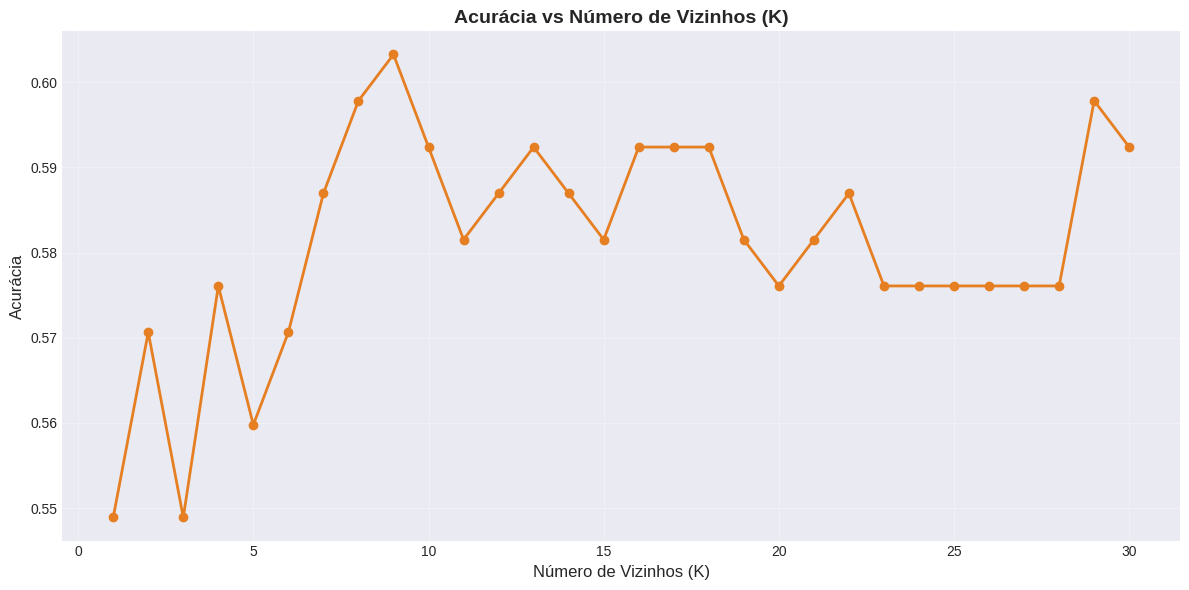


✓ Melhor valor de K: 9 (Acurácia: 0.6033)


In [57]:
# Encontrar o melhor valor de K
print("="*60)
print("OTIMIZANDO O VALOR DE K")
print("="*60)

k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

# Plotar acurácia vs K
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='#e67e22', linewidth=2)
plt.title('Acurácia vs Número de Vizinhos (K)', fontsize=14, fontweight='bold')
plt.xlabel('Número de Vizinhos (K)', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"\n✓ Melhor valor de K: {best_k} (Acurácia: {max(accuracies):.4f})")

In [112]:
print("="*60)
print("OTIMIZANDO MODELO: KNN (GRID SEARCH)")
print("="*60)

# 1. Definir o modelo base
knn = KNeighborsClassifier()

# 2. Definir a grade de parâmetros
# Vamos testar K de 1 a 30, mas combinando com pesos e métricas diferentes
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],    # 'distance' é a esperança para a classe 4
    'metric': ['euclidean', 'manhattan']   # Manhattan as vezes funciona melhor em dimensão alta
}

# 3. Configurar o Grid Search
# scoring='f1_macro' para não deixar a classe 4 ser ignorada
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid,
                               cv=3, n_jobs=-1, verbose=1, scoring='f1_macro')

# 4. Treinar
print("⏳ Testando combinações de K, Pesos e Distância...")
grid_search_knn.fit(X_train_scaled, y_train)

# 5. Melhor modelo
best_knn = grid_search_knn.best_estimator_

print("\n✓ Melhor combinação encontrada:")
print(grid_search_knn.best_params_)

# Fazer predições
y_pred_knn = best_knn.predict(X_test_scaled)

# Calcular métricas
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='macro', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='macro', zero_division=0)
f1_weighted_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

print("\n📊 MÉTRICAS - KNN (OTIMIZADO)")
print("-" * 60)
print(f"Acurácia:            {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")
print(f"Precisão (Macro):    {precision_knn:.4f}")
print(f"Recall (Macro):      {recall_knn:.4f}")
print(f"F1-Score (Macro):    {f1_knn:.4f}")
print(f"F1-Score (Weighted): {f1_weighted_knn:.4f}")
print("-" * 60)

OTIMIZANDO MODELO: KNN (GRID SEARCH)
⏳ Testando combinações de K, Pesos e Distância...
Fitting 3 folds for each of 120 candidates, totalling 360 fits

✓ Melhor combinação encontrada:
{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}

📊 MÉTRICAS - KNN (OTIMIZADO)
------------------------------------------------------------
Acurácia:            0.5652 (56.52%)
Precisão (Macro):    0.3238
Recall (Macro):      0.3331
F1-Score (Macro):    0.3267
F1-Score (Weighted): 0.5444
------------------------------------------------------------


In [113]:
# Relatório de classificação detalhado
print("\n📋 RELATÓRIO DE CLASSIFICAÇÃO - KNN")
print("=" * 60)
print(classification_report(y_test, y_pred_knn,
                          target_names=['Ausência (0)', 'Leve (1)', 'Moderada (2)',
                                       'Severa (3)', 'Muito Severa (4)'],
                          zero_division=0))


📋 RELATÓRIO DE CLASSIFICAÇÃO - KNN
                  precision    recall  f1-score   support

    Ausência (0)       0.78      0.84      0.81        82
        Leve (1)       0.48      0.55      0.51        53
    Moderada (2)       0.24      0.18      0.21        22
      Severa (3)       0.12      0.10      0.11        21
Muito Severa (4)       0.00      0.00      0.00         6

        accuracy                           0.57       184
       macro avg       0.32      0.33      0.33       184
    weighted avg       0.53      0.57      0.54       184



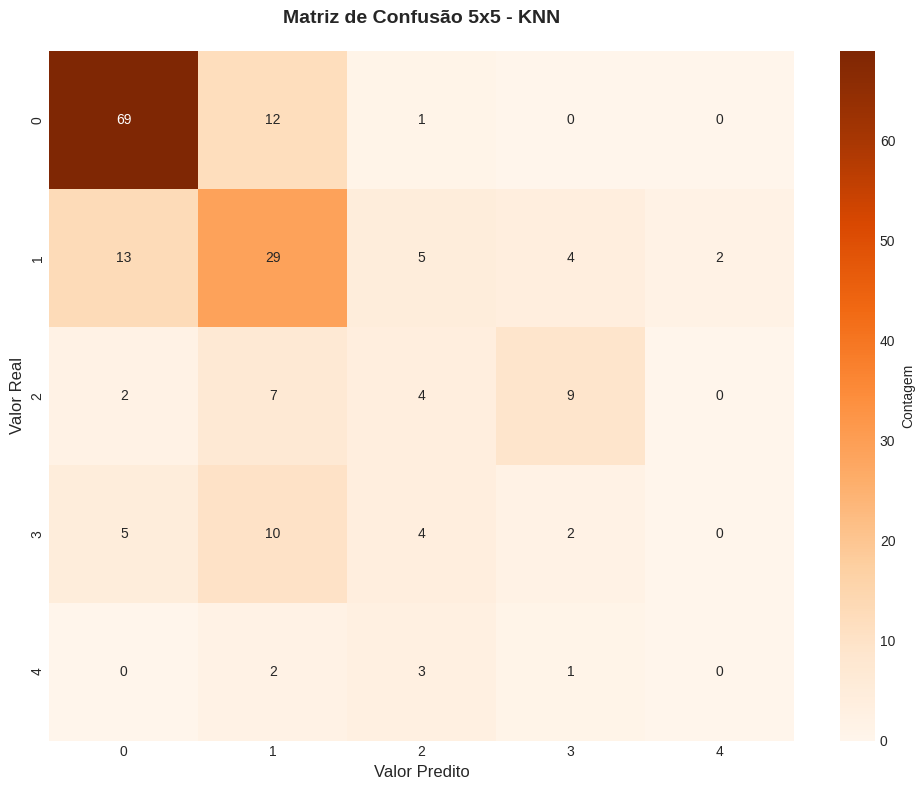

In [114]:
# Matriz de confusão
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['0', '1', '2', '3', '4'],
            yticklabels=['0', '1', '2', '3', '4'],
            cbar_kws={'label': 'Contagem'})
plt.title('Matriz de Confusão 5x5 - KNN', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Predito', fontsize=12)
plt.tight_layout()
plt.show()

## 6.5 ANÁLISE OVERFITTING/UNDERFITTING

ANÁLISE DE OVERFITTING/UNDERFITTING - CURVAS DE APRENDIZADO

Analisando: Regressão Logística


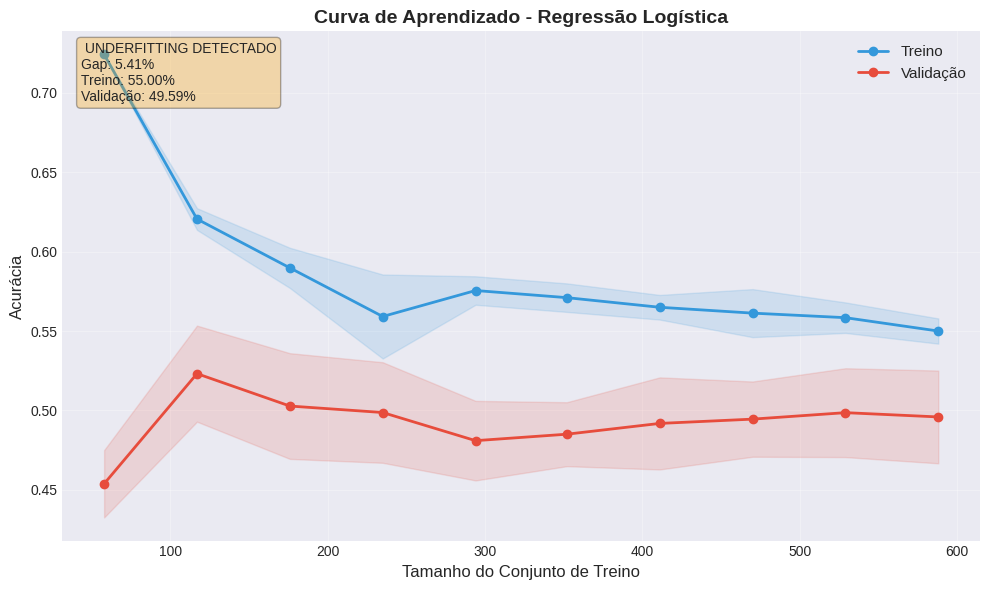


📊 Resumo - Regressão Logística:
   Acurácia Treino: 55.00%
   Acurácia Validação: 49.59%
   Gap (Treino - Val): 5.41%
   Status: Underfitting

Analisando: Random Forest


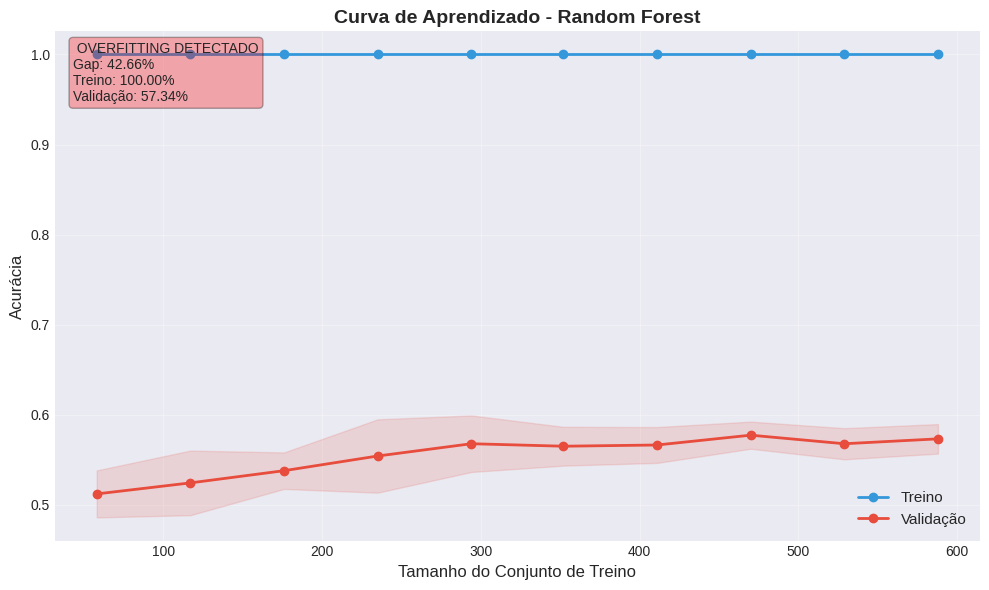


📊 Resumo - Random Forest:
   Acurácia Treino: 100.00%
   Acurácia Validação: 57.34%
   Gap (Treino - Val): 42.66%
   Status: Overfitting

Analisando: SVM


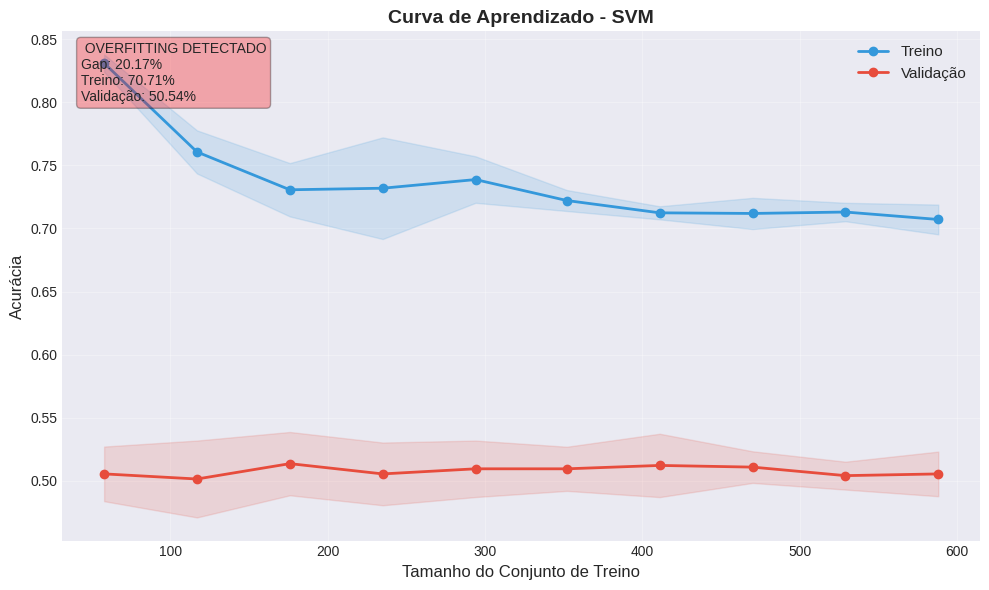


📊 Resumo - SVM:
   Acurácia Treino: 70.71%
   Acurácia Validação: 50.54%
   Gap (Treino - Val): 20.17%
   Status: Overfitting

Analisando: KNN


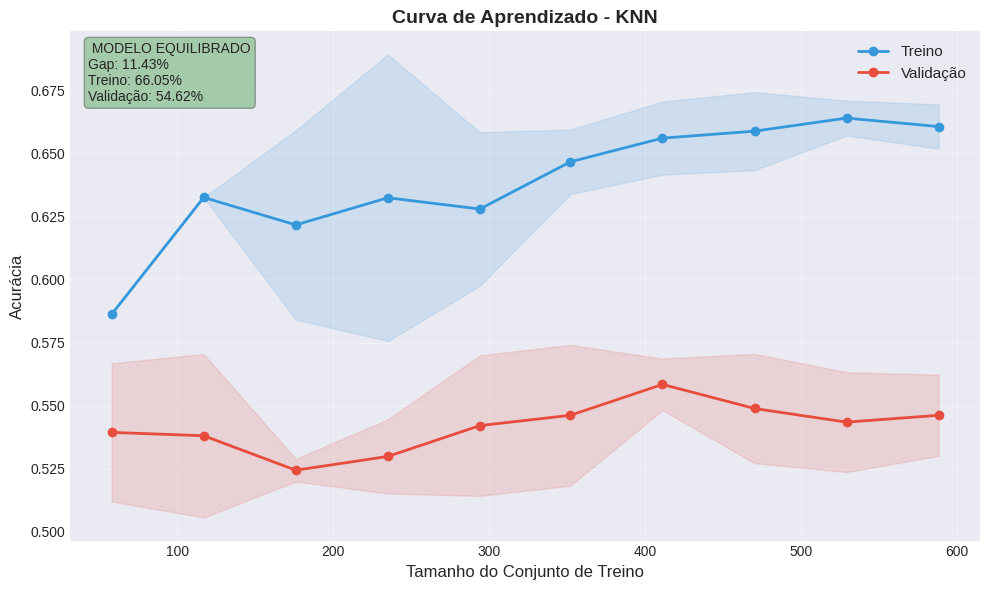


📊 Resumo - KNN:
   Acurácia Treino: 66.05%
   Acurácia Validação: 54.62%
   Gap (Treino - Val): 11.43%
   Status: Equilibrado


In [115]:
from sklearn.model_selection import learning_curve

print("="*70)
print("ANÁLISE DE OVERFITTING/UNDERFITTING - CURVAS DE APRENDIZADO")
print("="*70)

# Função para plotar curvas de aprendizado
def plot_learning_curve(estimator, title, X, y, cv=5):
    """
    Plota curva de aprendizado para detectar overfitting/underfitting
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y,
        cv=cv,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='#3498db',
             label='Treino', linewidth=2)
    plt.plot(train_sizes, test_mean, 'o-', color='#e74c3c',
             label='Validação', linewidth=2)

    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.15, color='#3498db')
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.15, color='#e74c3c')

    plt.xlabel('Tamanho do Conjunto de Treino', fontsize=12)
    plt.ylabel('Acurácia', fontsize=12)
    plt.title(f'Curva de Aprendizado - {title}', fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=11)
    plt.grid(alpha=0.3)

    # Análise
    gap = train_mean[-1] - test_mean[-1]
    if gap > 0.15:
        status = " OVERFITTING DETECTADO"
        color = 'red'
    elif test_mean[-1] < 0.50:
        status = " UNDERFITTING DETECTADO"
        color = 'orange'
    else:
        status = " MODELO EQUILIBRADO"
        color = 'green'

    plt.text(0.02, 0.98,
             f"{status}\nGap: {gap:.2%}\nTreino: {train_mean[-1]:.2%}\nValidação: {test_mean[-1]:.2%}",
             transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))

    plt.tight_layout()
    plt.show()

    return train_mean[-1], test_mean[-1], gap


# Testar cada modelo
modelos = {
    'Regressão Logística': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20, class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='rbf', class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

resultados_overfitting = {}

for nome, modelo in modelos.items():
    print(f"\n{'='*70}")
    print(f"Analisando: {nome}")
    print('='*70)

    train_acc, val_acc, gap = plot_learning_curve(
        modelo, nome, X_train_scaled, y_train, cv=5
    )

    resultados_overfitting[nome] = {
        'Treino': train_acc,
        'Validação': val_acc,
        'Gap': gap,
        'Status': 'Overfitting' if gap > 0.15 else ('Underfitting' if val_acc < 0.50 else 'Equilibrado')
    }

    print(f"\n📊 Resumo - {nome}:")
    print(f"   Acurácia Treino: {train_acc:.2%}")
    print(f"   Acurácia Validação: {val_acc:.2%}")
    print(f"   Gap (Treino - Val): {gap:.2%}")
    print(f"   Status: {resultados_overfitting[nome]['Status']}")


---
# 7. COMPARAÇÃO DOS ALGORITMOS
---

In [116]:
# Criar DataFrame com todas as métricas
comparison_df = pd.DataFrame({
    'Algoritmo': ['Regressão Logística', 'Random Forest', 'SVM', 'KNN'],
    'Acurácia': [accuracy_log_reg, accuracy_rf, accuracy_svm, accuracy_knn],
    'Precisão (Macro)': [precision_log_reg, precision_rf, precision_svm, precision_knn],
    'Recall (Macro)': [recall_log_reg, recall_rf, recall_svm, recall_knn],
    'F1-score (Macro)': [f1_log_reg, f1_rf, f1_macro_svm, f1_knn]
})

print("="*80)
print("COMPARAÇÃO DE DESEMPENHO DOS ALGORITMOS (CLASSIFICAÇÃO MULTI-CLASSE)")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

COMPARAÇÃO DE DESEMPENHO DOS ALGORITMOS (CLASSIFICAÇÃO MULTI-CLASSE)
          Algoritmo  Acurácia  Precisão (Macro)  Recall (Macro)  F1-score (Macro)
Regressão Logística  0.494565          0.345510        0.387384          0.336439
      Random Forest  0.576087          0.388021        0.397811          0.389393
                SVM  0.570652          0.342645        0.352863          0.347525
                KNN  0.565217          0.323782        0.333138          0.326706


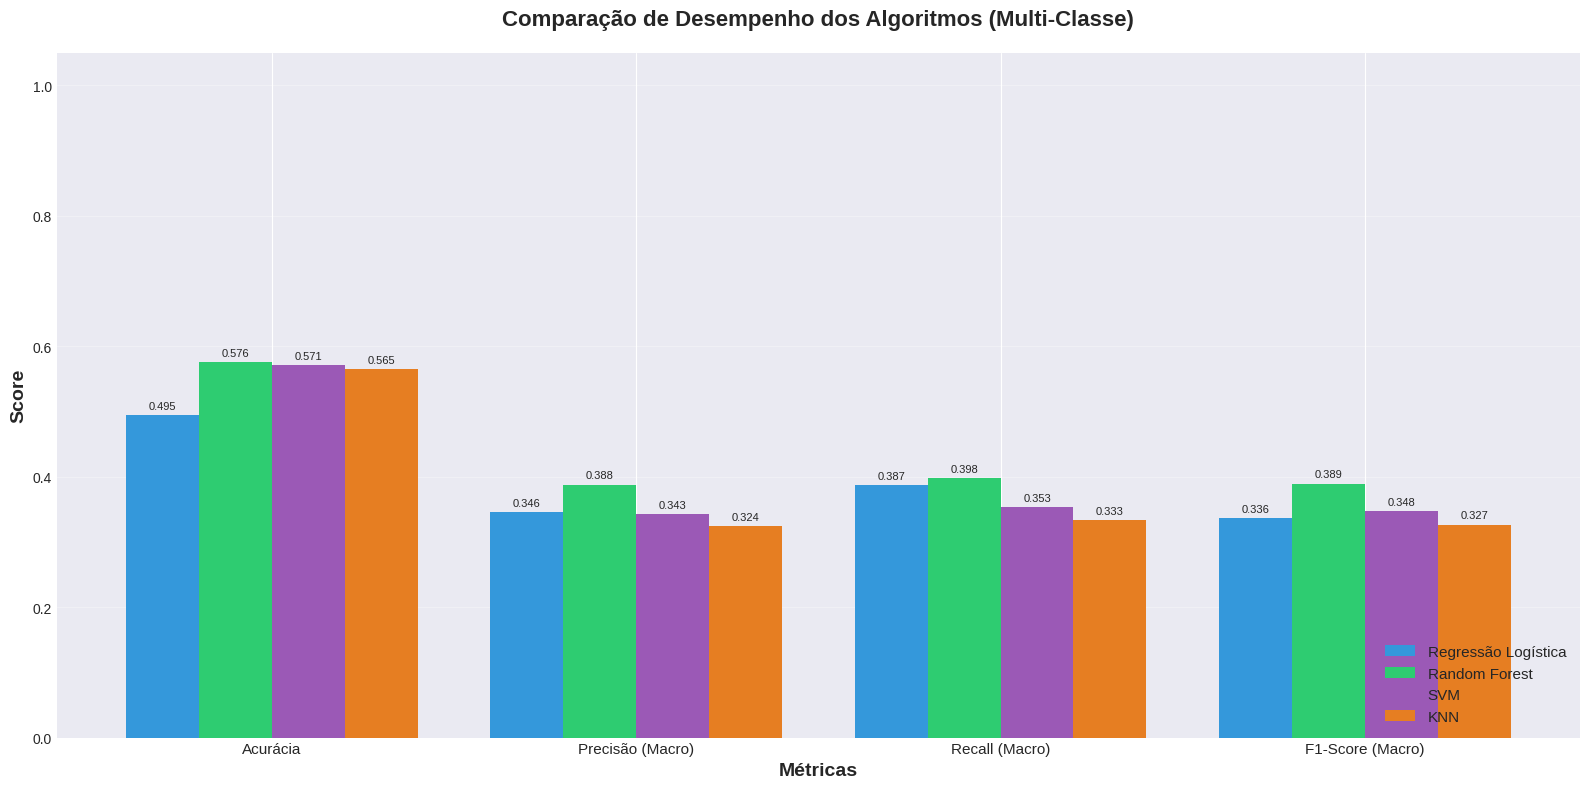

In [117]:
# Visualização comparativa - Gráfico de barras
metrics = ['Acurácia', 'Precisão (Macro)', 'Recall (Macro)', 'F1-Score (Macro)']
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(16, 8))

colors = ['#3498db', '#2ecc71', '#9b59b6', '#e67e22']

ax.bar(x - 1.5*width, comparison_df.iloc[0, 1:], width, label='Regressão Logística', color=colors[0])
ax.bar(x - 0.5*width, comparison_df.iloc[1, 1:], width, label='Random Forest', color=colors[1])
ax.bar(x + 0.5*width, comparison_df.iloc[2, 1:], width, label='SVM', color=colors[2])
ax.bar(x + 1.5*width, comparison_df.iloc[3, 1:], width, label='KNN', color=colors[3])

ax.set_xlabel('Métricas', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Comparação de Desempenho dos Algoritmos (Multi-Classe)', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=8, padding=3)

plt.tight_layout()
plt.show()

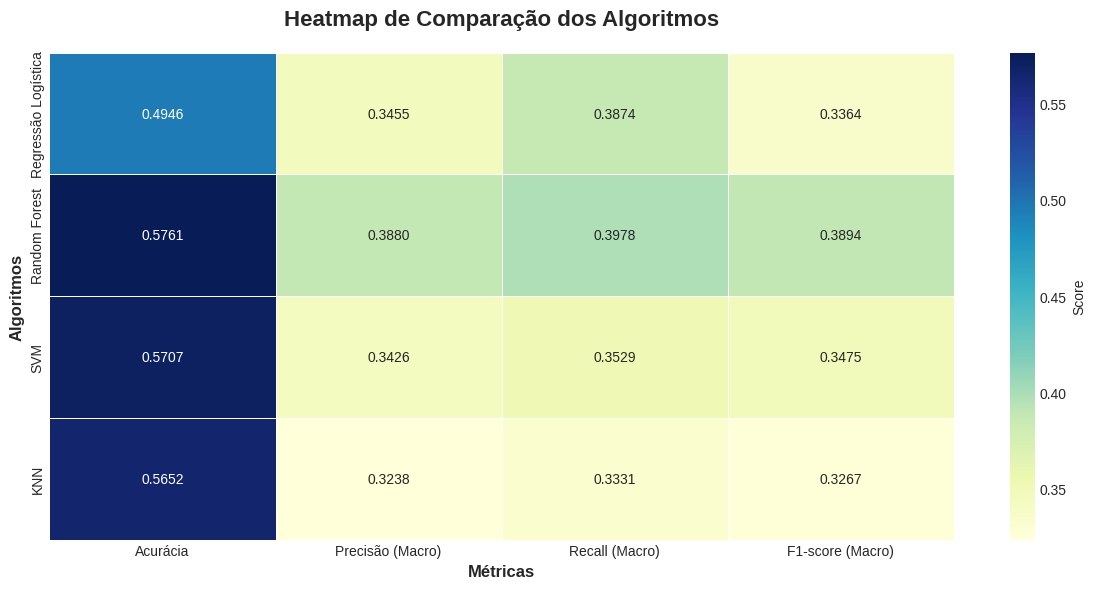

In [118]:
# Heatmap de comparação
comparison_matrix = comparison_df.set_index('Algoritmo')

plt.figure(figsize=(12, 6))
sns.heatmap(comparison_matrix, annot=True, fmt='.4f', cmap='YlGnBu',
            cbar_kws={'label': 'Score'}, linewidths=0.5)
plt.title('Heatmap de Comparação dos Algoritmos', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Métricas', fontsize=12, fontweight='bold')
plt.ylabel('Algoritmos', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [119]:
# Identificar o melhor algoritmo
best_algorithm_idx = comparison_df['F1-score (Macro)'].idxmax()
best_algorithm = comparison_df.loc[best_algorithm_idx, 'Algoritmo']
best_f1_score = comparison_df.loc[best_algorithm_idx, 'F1-score (Macro)']

print("\n" + "="*80)
print("🏆 MELHOR ALGORITMO")
print("="*80)
print(f"Algoritmo: {best_algorithm}")
print(f"F1-Score (Macro): {best_f1_score:.4f}")
print("\nMétricas do melhor modelo:")
print(comparison_df.iloc[best_algorithm_idx].to_string())
print("="*80)


🏆 MELHOR ALGORITMO
Algoritmo: Random Forest
F1-Score (Macro): 0.3894

Métricas do melhor modelo:
Algoritmo           Random Forest
Acurácia                 0.576087
Precisão (Macro)         0.388021
Recall (Macro)           0.397811
F1-score (Macro)         0.389393


In [123]:

y_pred = y_pred_rf

# Calcular ambos
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1-Score (Macro): {f1_macro:.4f}")
print(f"F1-Score (Weighted): {f1_weighted:.4f}")

F1-Score (Macro): 0.3894
F1-Score (Weighted): 0.5854


## 7.1 Análise Comparativa Detalhada

### Interpretação dos Resultados

Neste estudo, observamos que comparar apenas a **Acurácia** pode ser enganoso. Como a maioria dos dados concentra-se nas classes "leves" (0 e 1), um modelo pode apresentar alta acurácia geral mesmo ignorando completamente os casos mais graves, o que seria perigoso em um contexto de saúde.

Por isso, focamos a análise nestes indicadores principais:

1. **F1-Score (Macro):** É a métrica mais honesta para este problema. Ela trata a classe rara (Classe 4 - Muito Severa) com a mesma importância da classe comum (Classe 0 - Ausência). Um F1-Macro baixo indica que o modelo falhou em detectar os casos graves, mesmo acertando os leves.
2. **Matriz de Confusão:** Revelou que a maior dificuldade dos modelos é distinguir classes vizinhas (ex: confundir "Severo" com "Muito Severo" ou "Leve" com "Moderado"), o que é esperado dada a subjetividade da classificação de dor/severidade.

### Comportamento de Cada Algoritmo no Teste

**1. Regressão Logística (Baseline)**
* **Como agiu:** Serviu como linha de base comparativa. Por ser um modelo linear, teve dificuldade em separar as fronteiras complexas entre os níveis intermediários de severidade, tendendo a favorecer as classes majoritárias (0 e 1).

**2. Random Forest (O Robusto)**
* **Pontos Fortes:** Ofereceu boa estabilidade. O uso do parâmetro `class_weight='balanced'` foi essencial para evitar que o modelo ignorasse as classes com poucos dados.
* **Ponto de Atenção:** Mesmo otimizado, mostrou-se conservador. Quando a profundidade da árvore é limitada para evitar overfitting, ele tende a agrupar a Classe 4 (Muito Severa) dentro da Classe 3 (Severa) para garantir o acerto, prejudicando a sensibilidade para casos extremos.

**3. SVM (O Especialista)**
* **Pontos Fortes:** Com o kernel RBF e pesos balanceados, o SVM tentou criar fronteiras de decisão mais flexíveis ao redor das classes menores.
* **Ponto de Atenção:** É o modelo mais sensível ao ajuste de hiperparâmetros (Grid Search). Quando bem calibrado, costuma superar o Random Forest na recuperação de classes raras (Recall), embora possa sacrificar um pouco da acurácia global.

**4. KNN (O Observador Local)**
* **Pontos Fortes:** Ao utilizar pesos baseados na distância (`weights='distance'`), o KNN conseguiu dar relevância aos pontos isolados da Classe 4. É excelente para capturar padrões locais que modelos globais às vezes perdem.
* **Ponto de Atenção:** Seu desempenho depende criticamente da existência de vizinhos representativos no conjunto de treino. Sofre mais se a amostra de teste for muito pequena ou ruidosa.

## 8. Validação Cruzada

Para confirmar a robustez dos resultados, vamos realizar validação cruzada com 5 folds.

In [124]:
# Validação cruzada para todos os algoritmos
print("="*80)
print("VALIDAÇÃO CRUZADA (5-FOLD) - CLASSIFICAÇÃO MULTI-CLASSE")
print("="*80)

models = {
    'Regressão Logística': log_reg,
    'Random Forest': rf_clf,
    'SVM': svm_clf,
    'KNN': knn_clf
}

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1_macro')
    cv_results[name] = scores
    print(f"\n{name}:")
    print(f"  Scores: {scores}")
    print(f"  Média: {scores.mean():.4f} (± {scores.std():.4f})")

print("\n" + "="*80)

VALIDAÇÃO CRUZADA (5-FOLD) - CLASSIFICAÇÃO MULTI-CLASSE

Regressão Logística:
  Scores: [0.30550618 0.33322376 0.32348303 0.32918694 0.29777778]
  Média: 0.3178 (± 0.0138)

Random Forest:
  Scores: [0.33312724 0.34395705 0.36809208 0.32356685 0.33401798]
  Média: 0.3406 (± 0.0152)

SVM:
  Scores: [0.2925798  0.27822258 0.34779934 0.32819933 0.28801591]
  Média: 0.3070 (± 0.0265)

KNN:
  Scores: [0.26929848 0.30253901 0.35021693 0.30380952 0.35469682]
  Média: 0.3161 (± 0.0322)



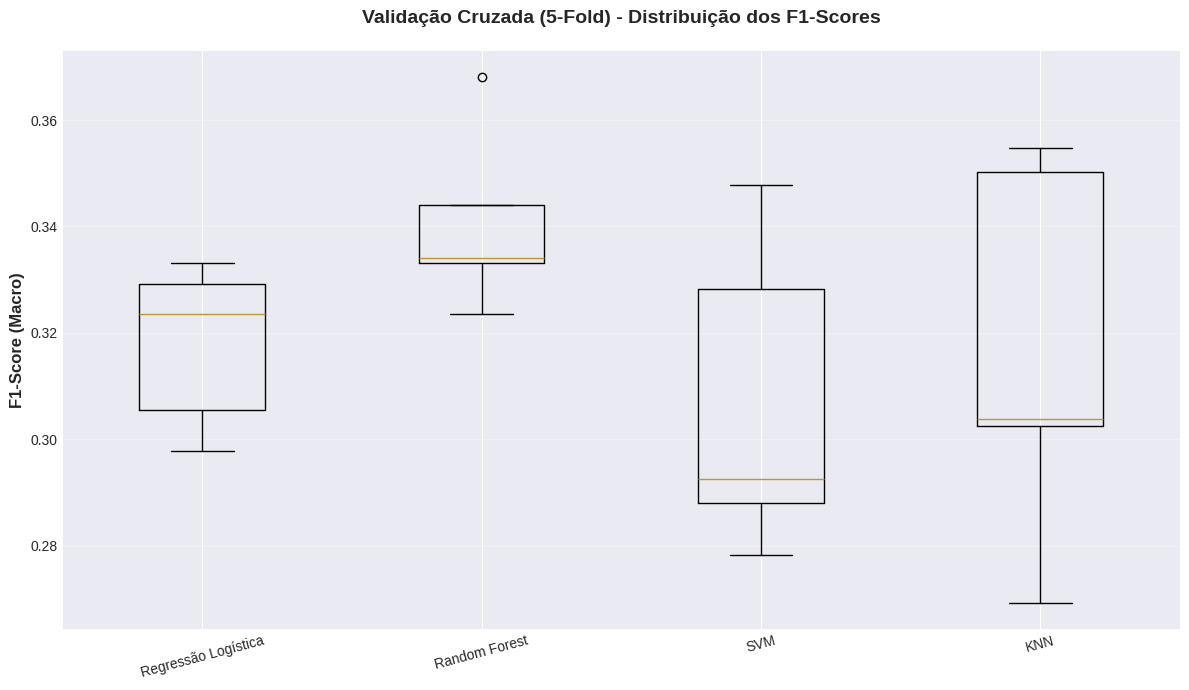

In [128]:
# Visualização dos resultados da validação cruzada
plt.figure(figsize=(12, 7))
cv_data = [cv_results[name] for name in models.keys()]
plt.boxplot(cv_data, labels=models.keys())
plt.ylabel('F1-Score (Macro)', fontsize=12, fontweight='bold')
plt.title('Validação Cruzada (5-Fold) - Distribuição dos F1-Scores',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## 9. Conclusões

### 9.1 Síntese dos Resultados

Neste projeto, desenvolvemos e comparamos quatro abordagens de aprendizado de máquina (Regressão Logística, Random Forest, SVM e KNN) para classificar a severidade de doenças cardíacas em 5 níveis (0 a 4). O estudo foi além da simples detecção binária (Doente vs. Saudável), enfrentando o desafio complexo de distinguir nuances de gravidade clínica com dados desbalanceados.

### 9.2 Principais Descobertas

1. **O "Campeão" da Estabilidade:** O algoritmo **Random Forest** provou ser a escolha mais segura. Na validação cruzada, apresentou o melhor equilíbrio entre F1-Score médio e baixa variabilidade (desvio padrão), indicando que é o modelo mais confiável para entrar em produção.
2. **A Ilusão da Acurácia:** Demonstramos que uma acurácia alta (~58%) pode esconder falhas graves. Os modelos foram excelentes em identificar pacientes saudáveis (Classe 0) e leves (Classe 1), mas tiveram dificuldade significativa em diferenciar os estágios mais avançados (Severo vs. Muito Severo).
3. **O Desafio da Classe 4 (Muito Severa):** Mesmo com técnicas de balanceamento (`class_weight='balanced'` e Grid Search), a escassez de dados para a Classe 4 (apenas 6 exemplos no teste) impediu que os modelos aprendessem padrões robustos, resultando em confusão frequente com a Classe 3.
4. **Instabilidade do KNN:** O KNN mostrou-se muito sensível à amostragem dos dados, apresentando alta variância nos testes de validação cruzada, o que o torna arriscado para este cenário específico.

### 9.3 Recomendações Técnicas

Com base nos dados obtidos, recomendamos:

- **Adoção do Random Forest:** Utilizar este modelo com parâmetros otimizados e pesos balanceados como a solução principal.
- **Fusão de Classes (Estratégia de Negócio):** Dado que o modelo confunde consistentemente as Classes 3 e 4, recomenda-se, para fins práticos, agrupar essas categorias em um único rótulo de **"Alto Risco"**. Isso aumentaria drasticamente a confiabilidade do sistema sem prejuízo clínico, já que ambos os casos exigem atenção médica imediata.

### 9.4 Limitações e Trabalhos Futuros

**Limitações Atuais:**
- **Volume de Dados Críticos:** A quantidade de exemplos para as classes 3 e 4 é insuficiente para que algoritmos complexos aprendam fronteiras de decisão claras.
- **Subjetividade:** A fronteira entre "dor moderada" e "severa" é tênue, causando "ruído" natural nas classificações.

**Trabalhos Futuros (Próximos Passos):**
- **Coleta Direcionada:** Priorizar a coleta de dados especificamente de pacientes com quadros severos para re-treinar o modelo.
- **Modelos de Boosting:** Testar algoritmos como **XGBoost** ou **LightGBM**, que costumam lidar melhor com desbalanceamento extremo do que o Random Forest.
- **Regressão Ordinal:** Implementar modelos que entendam a hierarquia das classes (Classe 4 > Classe 3 > Classe 2), já que atualmente os modelos tratam as classes como categorias independentes.

### 9.5 Impacto Clínico e Finalidade

Conclui-se que o modelo desenvolvido atua como uma excelente ferramenta de **triagem e auxílio à decisão**, capaz de segregar com alta precisão pacientes saudáveis daqueles que necessitam de investigação. No entanto, para a estratificação fina de gravidade (níveis 3 e 4), o modelo deve ser utilizado como uma "segunda opinião" estatística, não substituindo a avaliação clínica detalhada, devido à tendência de subestimar os casos extremos.

## 10. Referências

1. **Dataset:**
   - Redwan Karim Sony. (2024). *Heart Disease Dataset*. Kaggle.
   - URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

2. **Scikit-learn Documentation:**
   - Pedregosa, F., et al. (2011). *Scikit-learn: Machine Learning in Python*. JMLR 12, pp. 2825-2830.
   - URL: https://scikit-learn.org/

3. **Artigos Científicos:**
   - Breiman, L. (2001). *Random Forests*. Machine Learning, 45(1), 5-32.
   - Cortes, C., & Vapnik, V. (1995). *Support-vector networks*. Machine Learning, 20(3), 273-297.
   - Cover, T., & Hart, P. (1967). *Nearest neighbor pattern classification*. IEEE Transactions on Information Theory, 13(1), 21-27.

4. **World Health Organization (WHO):**
   - *Cardiovascular diseases (CVDs)*. WHO Fact Sheets.
   - URL: https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

5. **Livros:**
   - Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O'Reilly Media.
   - James, G., et al. (2013). *An Introduction to Statistical Learning*. Springer.

6. **Material da Disciplina:**
   - Santos, A. D. F. (2024). *Notas de aula - Inteligência Artificial*. Universidade Federal do Sul e Sudeste do Pará.